# Exploratory Data Analysis

Notebook containing exploratory data analysis of various financial returns.

Data Notes:

- ~~GDAX exchange had a system error in 2017-04-16 that led to BTC value crashing to 0.06, this is erroneous and was dropped from the data (only discovered this through manual inspection and subsequent googling)~~
- GDAX data was unreliable, only using daily prices from Yahoo Finance now
- Observational note on BTC/USD data, in early Feb. 2014 Mt.Gox suspended withdrawls thus leading to a steep drop in prices, subsequently at the end of the month prices returned to normal thus resulting in the biggest jump in daily returns




In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

In [2]:
# data read in, adjustment and conversion to returns
sp500_data = pd.read_csv("./data/sp500index.csv")
sp500_data.index = sp500_data["Date"].astype('datetime64[ns]')
sp500_data.drop(columns=['Date'],inplace=True)

btc_data = pd.read_csv("./data/btc-usd.csv")
btc_data.index = btc_data["Date"].astype('datetime64[ns]')
btc_data.drop(columns=['Date'],inplace=True)

chfusd_data = pd.read_csv("./data/CHF_USD_CME.csv")
chfusd_data.index = chfusd_data['Date'].astype('datetime64[ns]')
chfusd_data.drop(columns=['Date'],inplace=True)

# convert to returns and normalize returns
sp500_returns = sp500_data['Close'].pct_change()[1:]
sp500_returns = (sp500_returns - np.mean(sp500_returns))/np.std(sp500_returns) # normalize to have mean 0 std 1

btc_returns = btc_data['Close'].pct_change()[1:]
btc_returns = (btc_returns - np.mean(btc_returns))/np.std(btc_returns) # normalize to have mean 0 std 1

chfusd_returns = chfusd_data['Last'].pct_change()[1:]
chfusd_returns = (chfusd_returns - np.mean(chfusd_returns))/np.std(chfusd_returns) # normalize to have mean 0 std 1

In [3]:
chfusd_data.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2018-05-14,1.0025,1.0069,1.0018,1.0024,0.0008,1.0026,18580.0,102597.0
2018-05-11,0.9996,1.0052,0.9988,1.0024,0.0012,1.0018,23806.0,101069.0
2018-05-10,0.9974,1.0035,0.9972,1.0000,0.0025,1.0006,23765.0,99207.0
2018-05-09,1.0013,1.0025,0.9973,0.9978,0.0029,0.9981,21415.0,97682.0
2018-05-08,1.0001,1.0028,0.9986,1.0013,0.0005,1.0010,27551.0,94122.0


In [4]:
sp500_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [5]:
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


## Returns

Plotting the time series plot of the prices. Converting prices into returns and plotting their histogram.

### S&P500 Returns

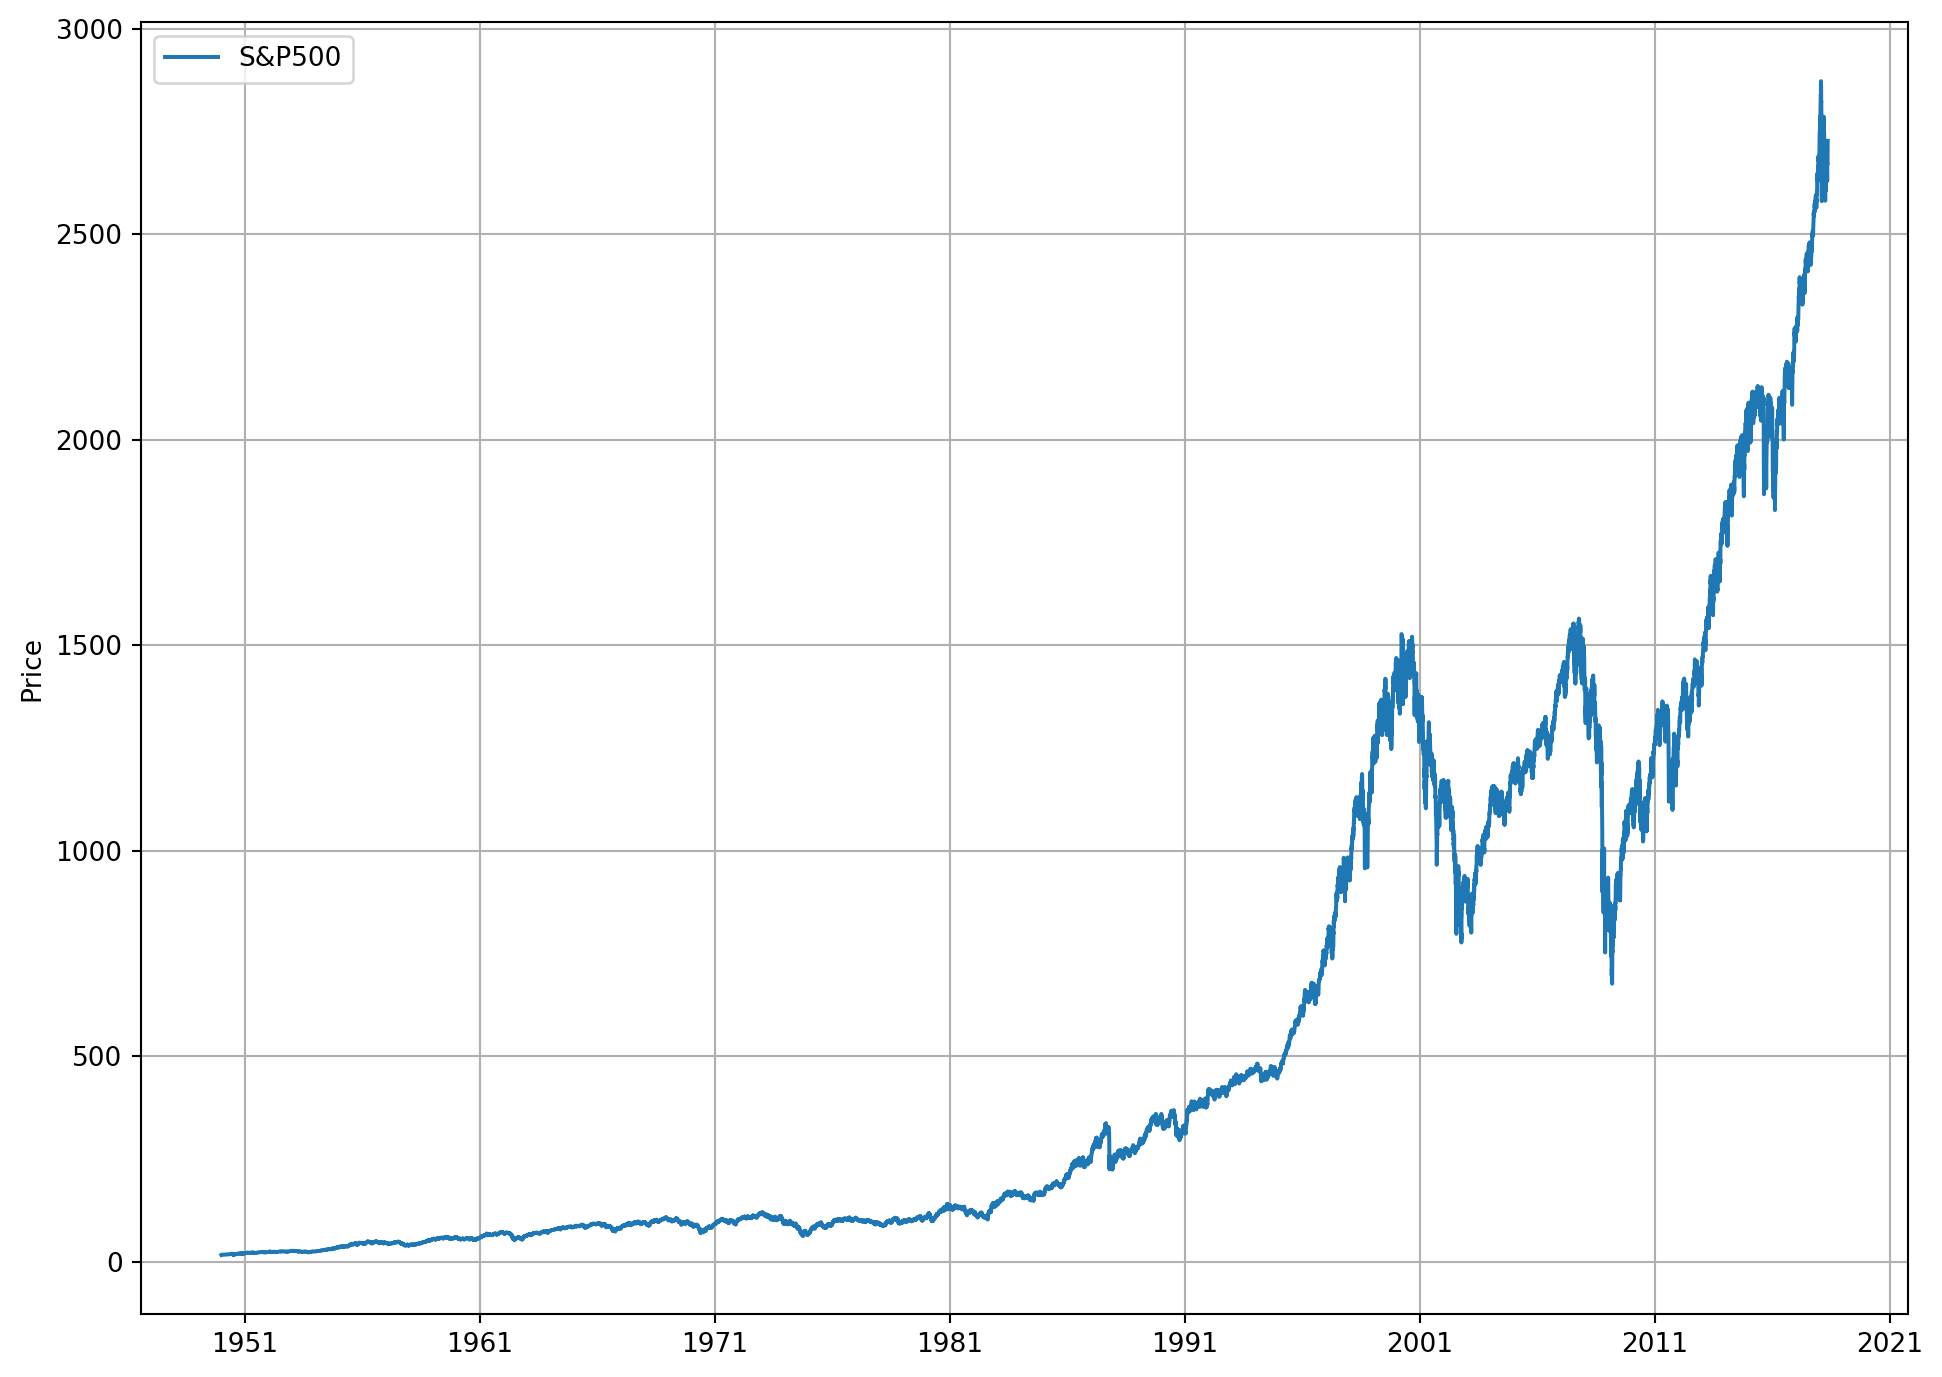

In [6]:
plt.figure(figsize=(12, 9), dpi=190)
plt.plot(sp500_data.index, sp500_data['Close'])
plt.grid(True)
plt.ylabel('Price')
plt.legend(['S&P500']);

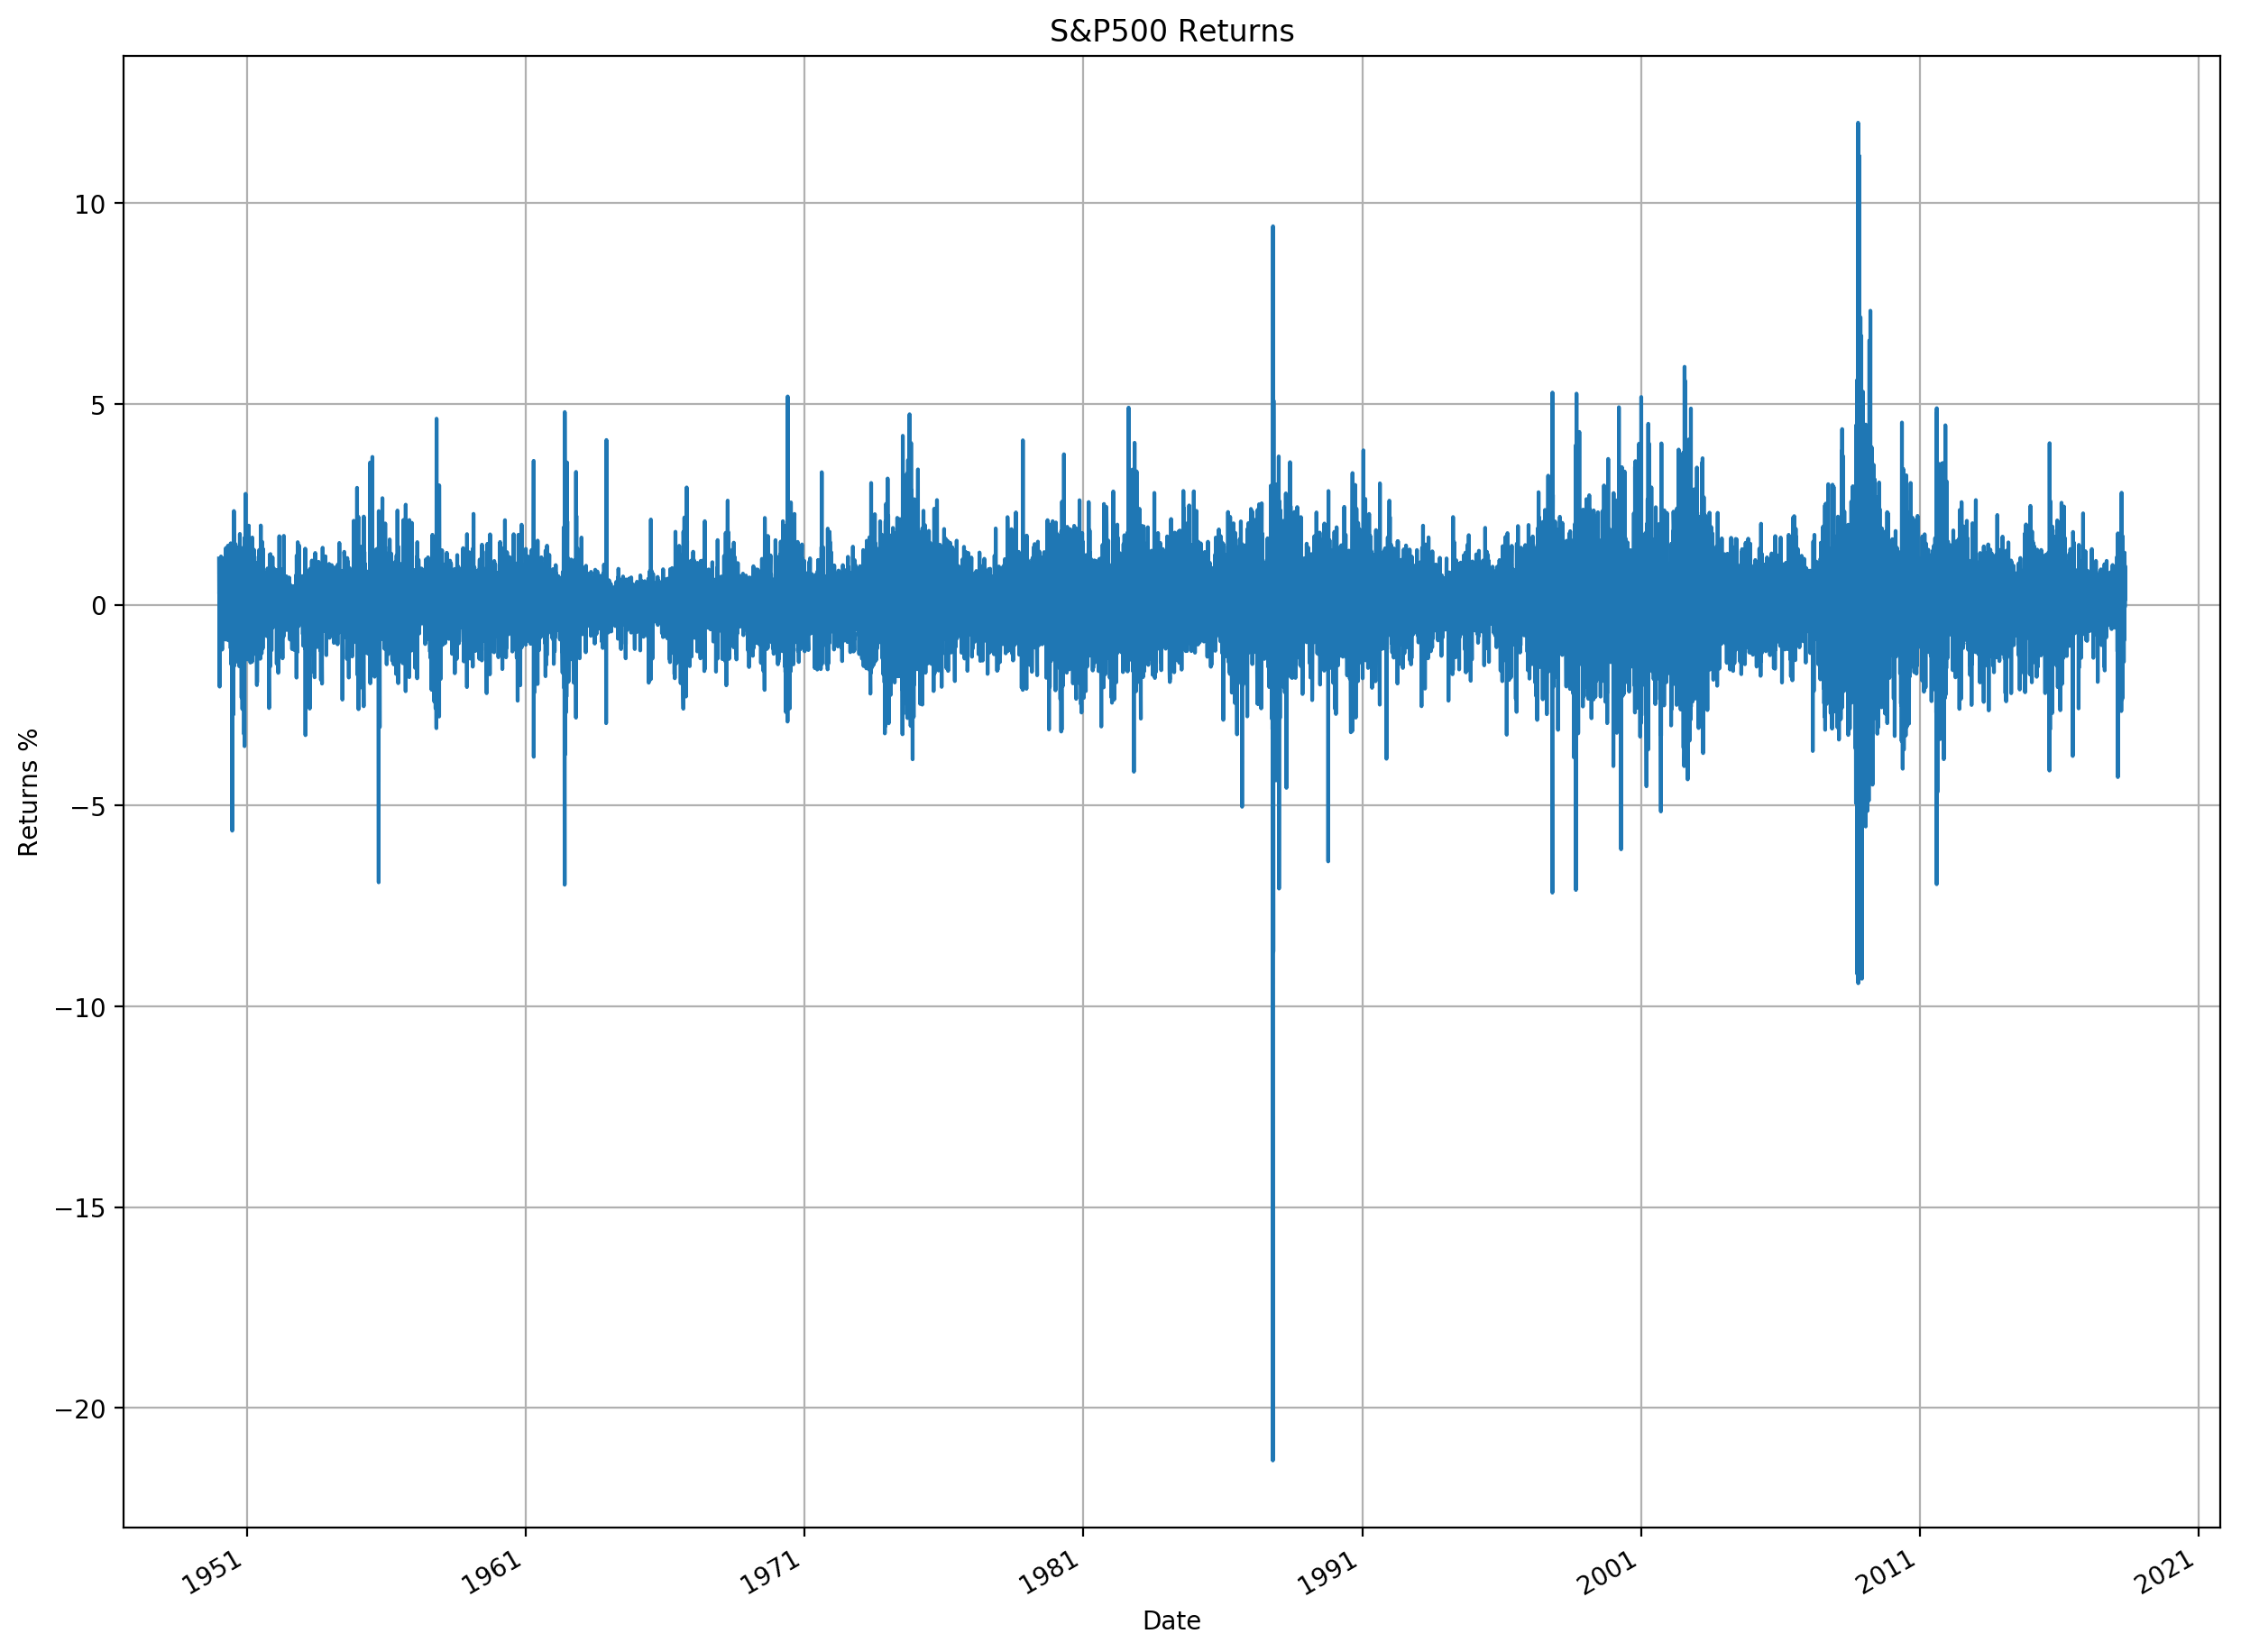

In [47]:
plt.figure(figsize=(15, 12), dpi=200)
sp500_returns.plot(title='S&P500 Returns',grid=True)
plt.ylabel('Returns %')
plt.savefig('sp500_returns.pdf');

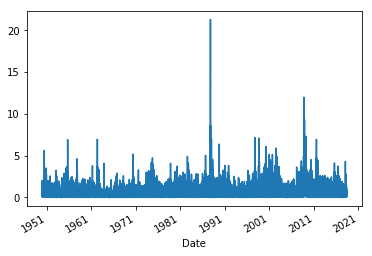

In [14]:
abs_sp500_returns = abs(sp500_returns)
abs_sp500_returns.plot()

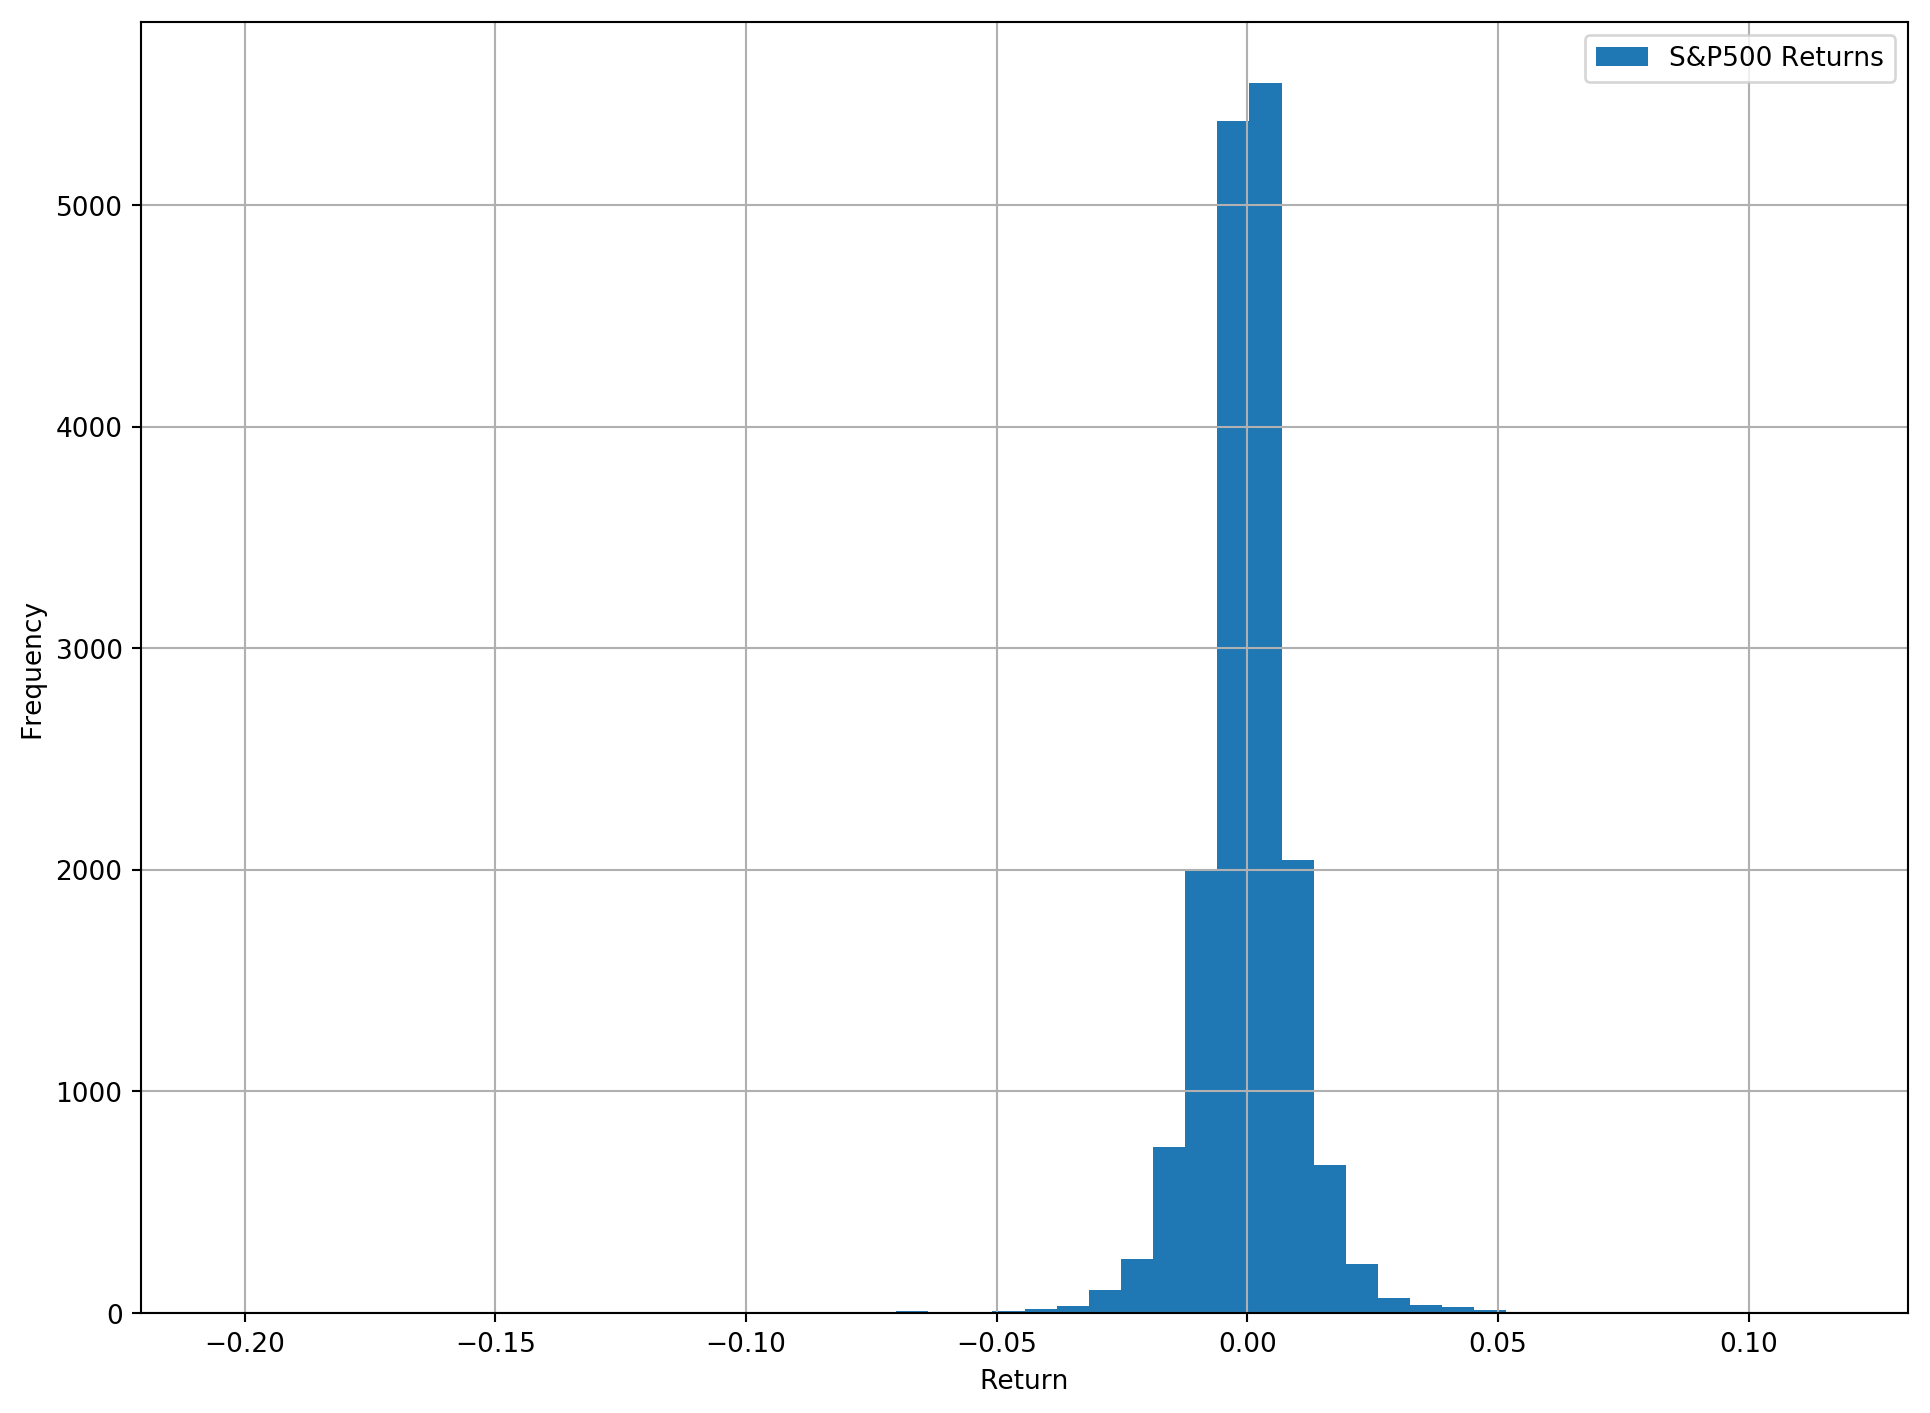

In [12]:
plt.figure(figsize=(12, 9), dpi=190)
plt.hist(sp500_returns, bins=50)
plt.grid(True)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['S&P500 Returns']);

Plotting rolling 3m,6m,12m volatility on absolute S&P500 returns

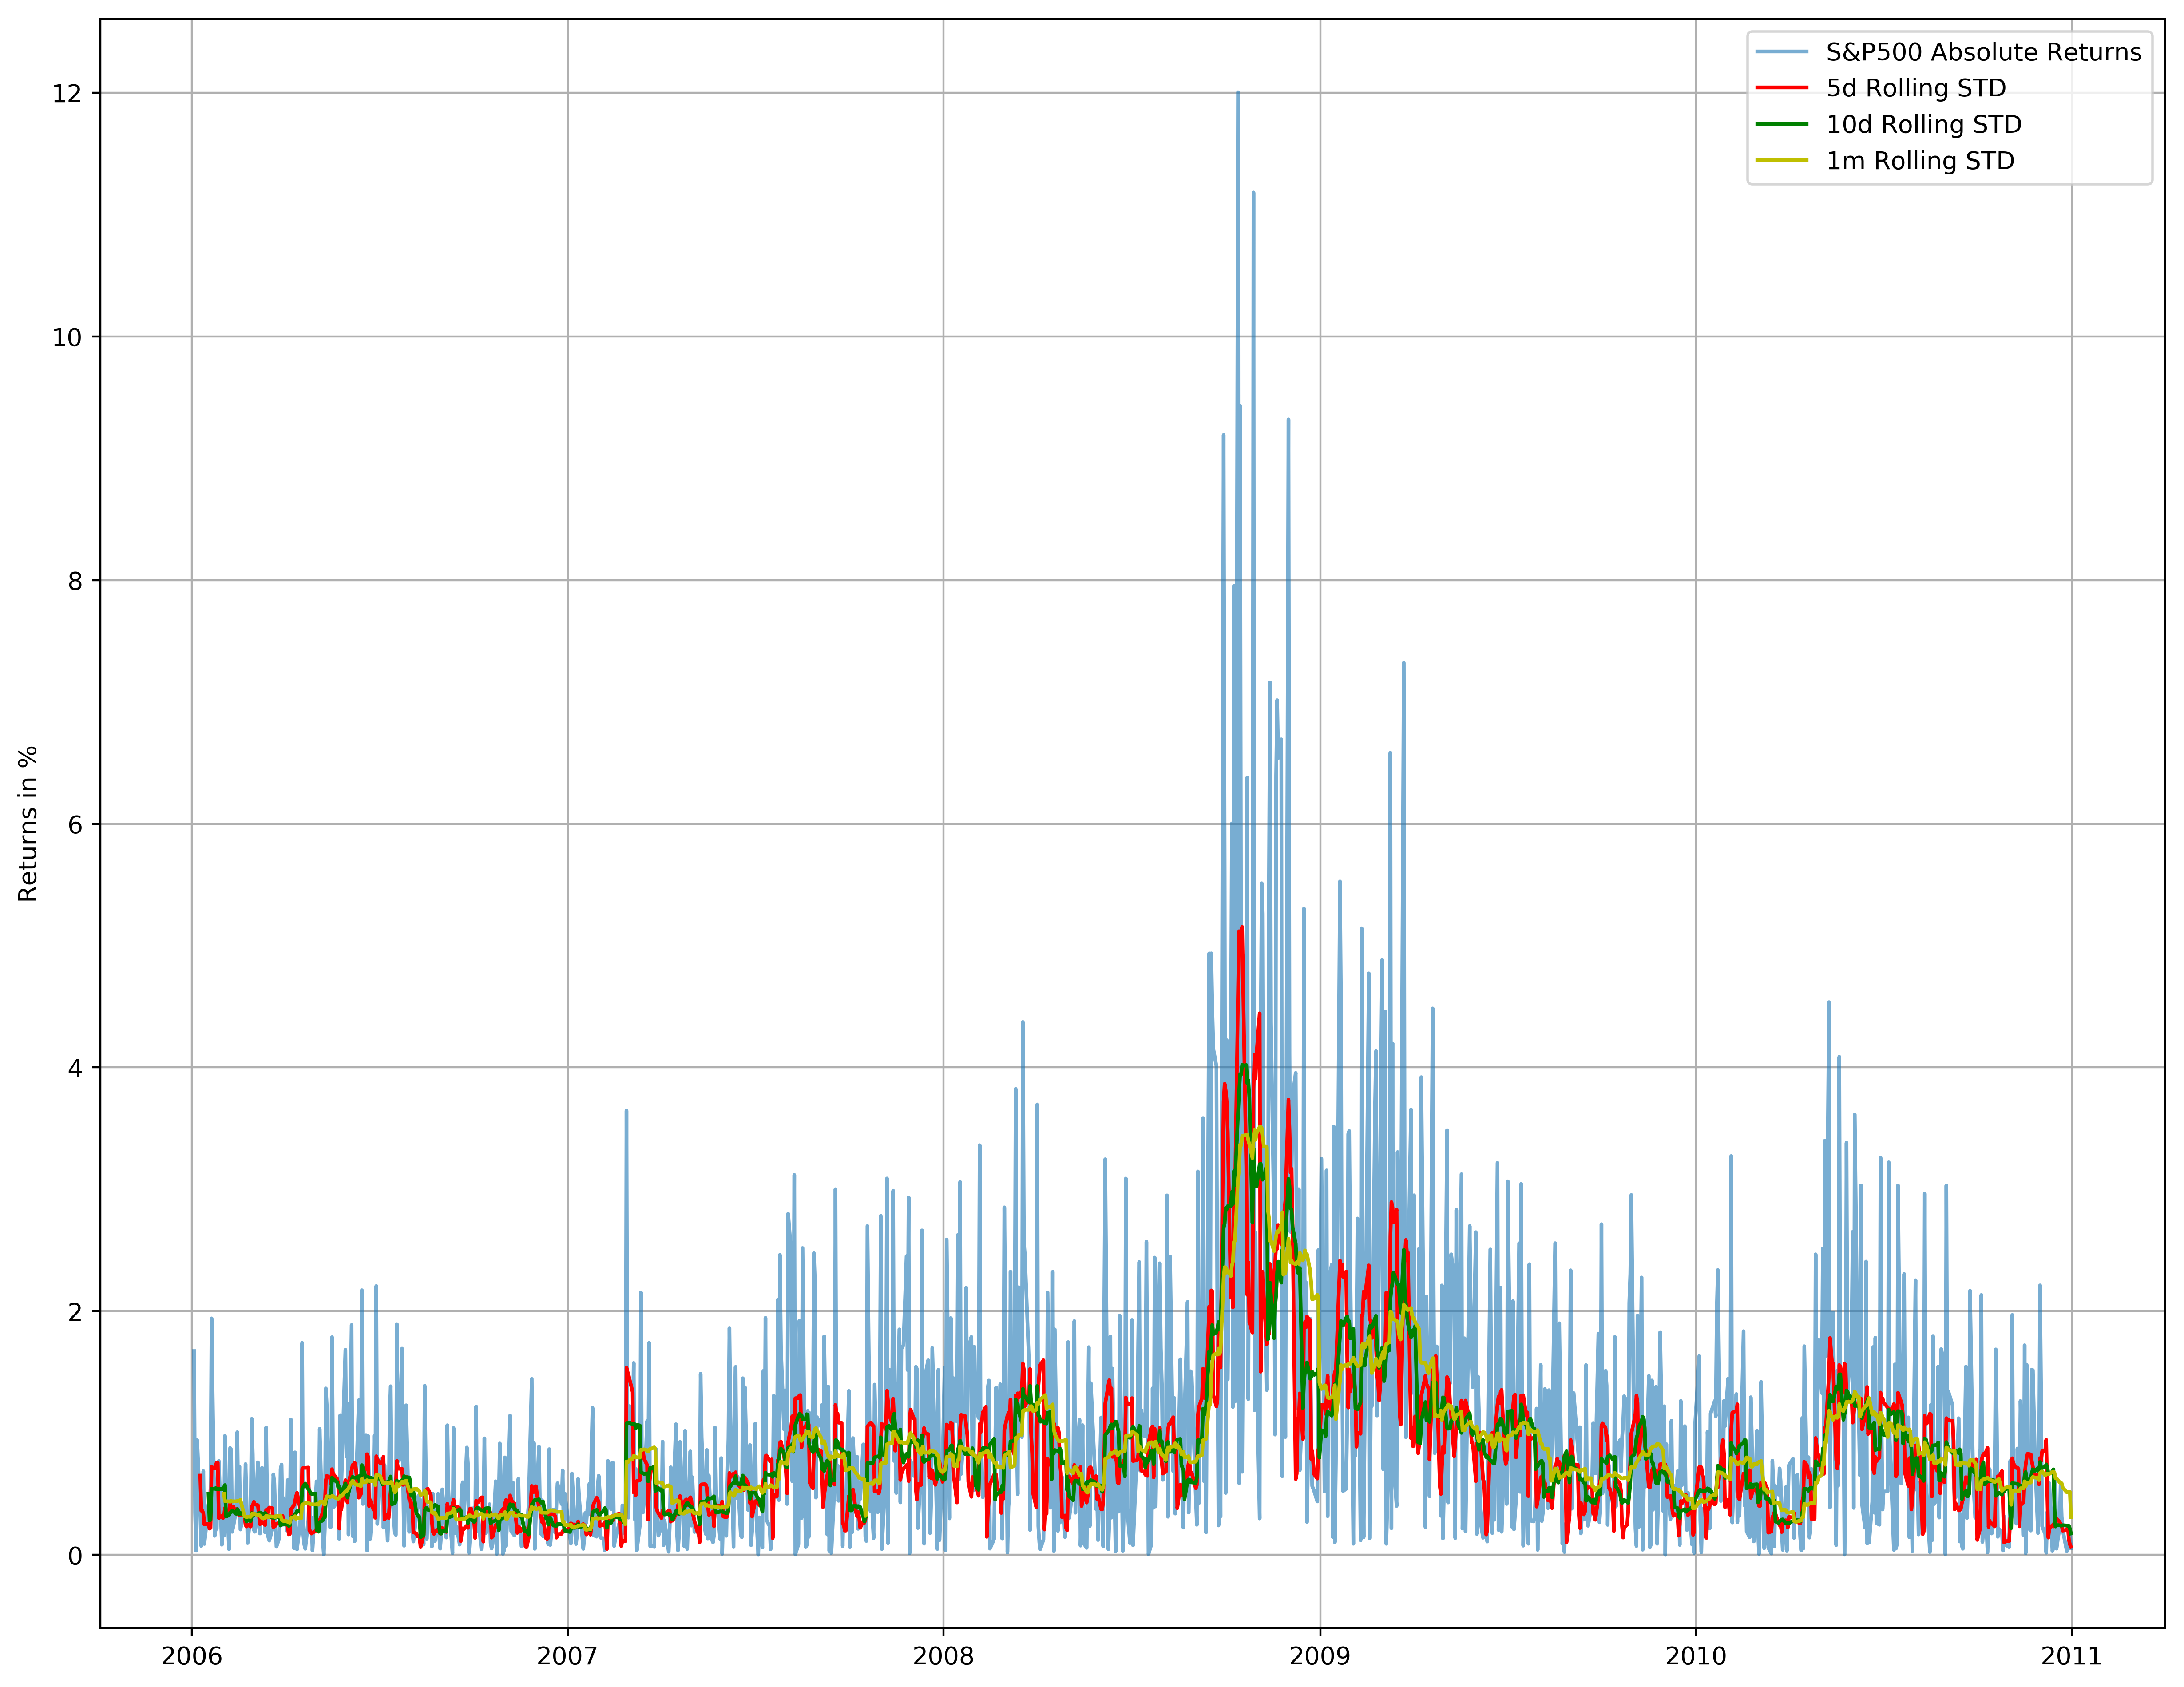

In [50]:
abs_sp500_returns = abs(sp500_returns['2006':'2010'])
window_5d = 5
window_10d = 10
window_1m = 21

rolling5d = abs_sp500_returns.rolling(window=window_5d, center=False).std()
rolling10d = abs_sp500_returns.rolling(window=window_10d, center=False).std()
rolling1m = abs_sp500_returns.rolling(window=window_1m, center=False).std()

plt.figure(figsize=(15,12), dpi=400)
plt.plot(abs_sp500_returns.index, abs_sp500_returns, alpha=0.6)
plt.plot(rolling5d, color='r')
plt.plot(rolling10d, color='g')
plt.plot(rolling1m, color='y')
plt.legend(['S&P500 Absolute Returns', '5d Rolling STD', '10d Rolling STD', '1m Rolling STD']);

plt.grid(True)
plt.ylabel('Returns in %')
plt.savefig('abs_sp500_returns.png')
plt.show();

### BTC/USD Returns

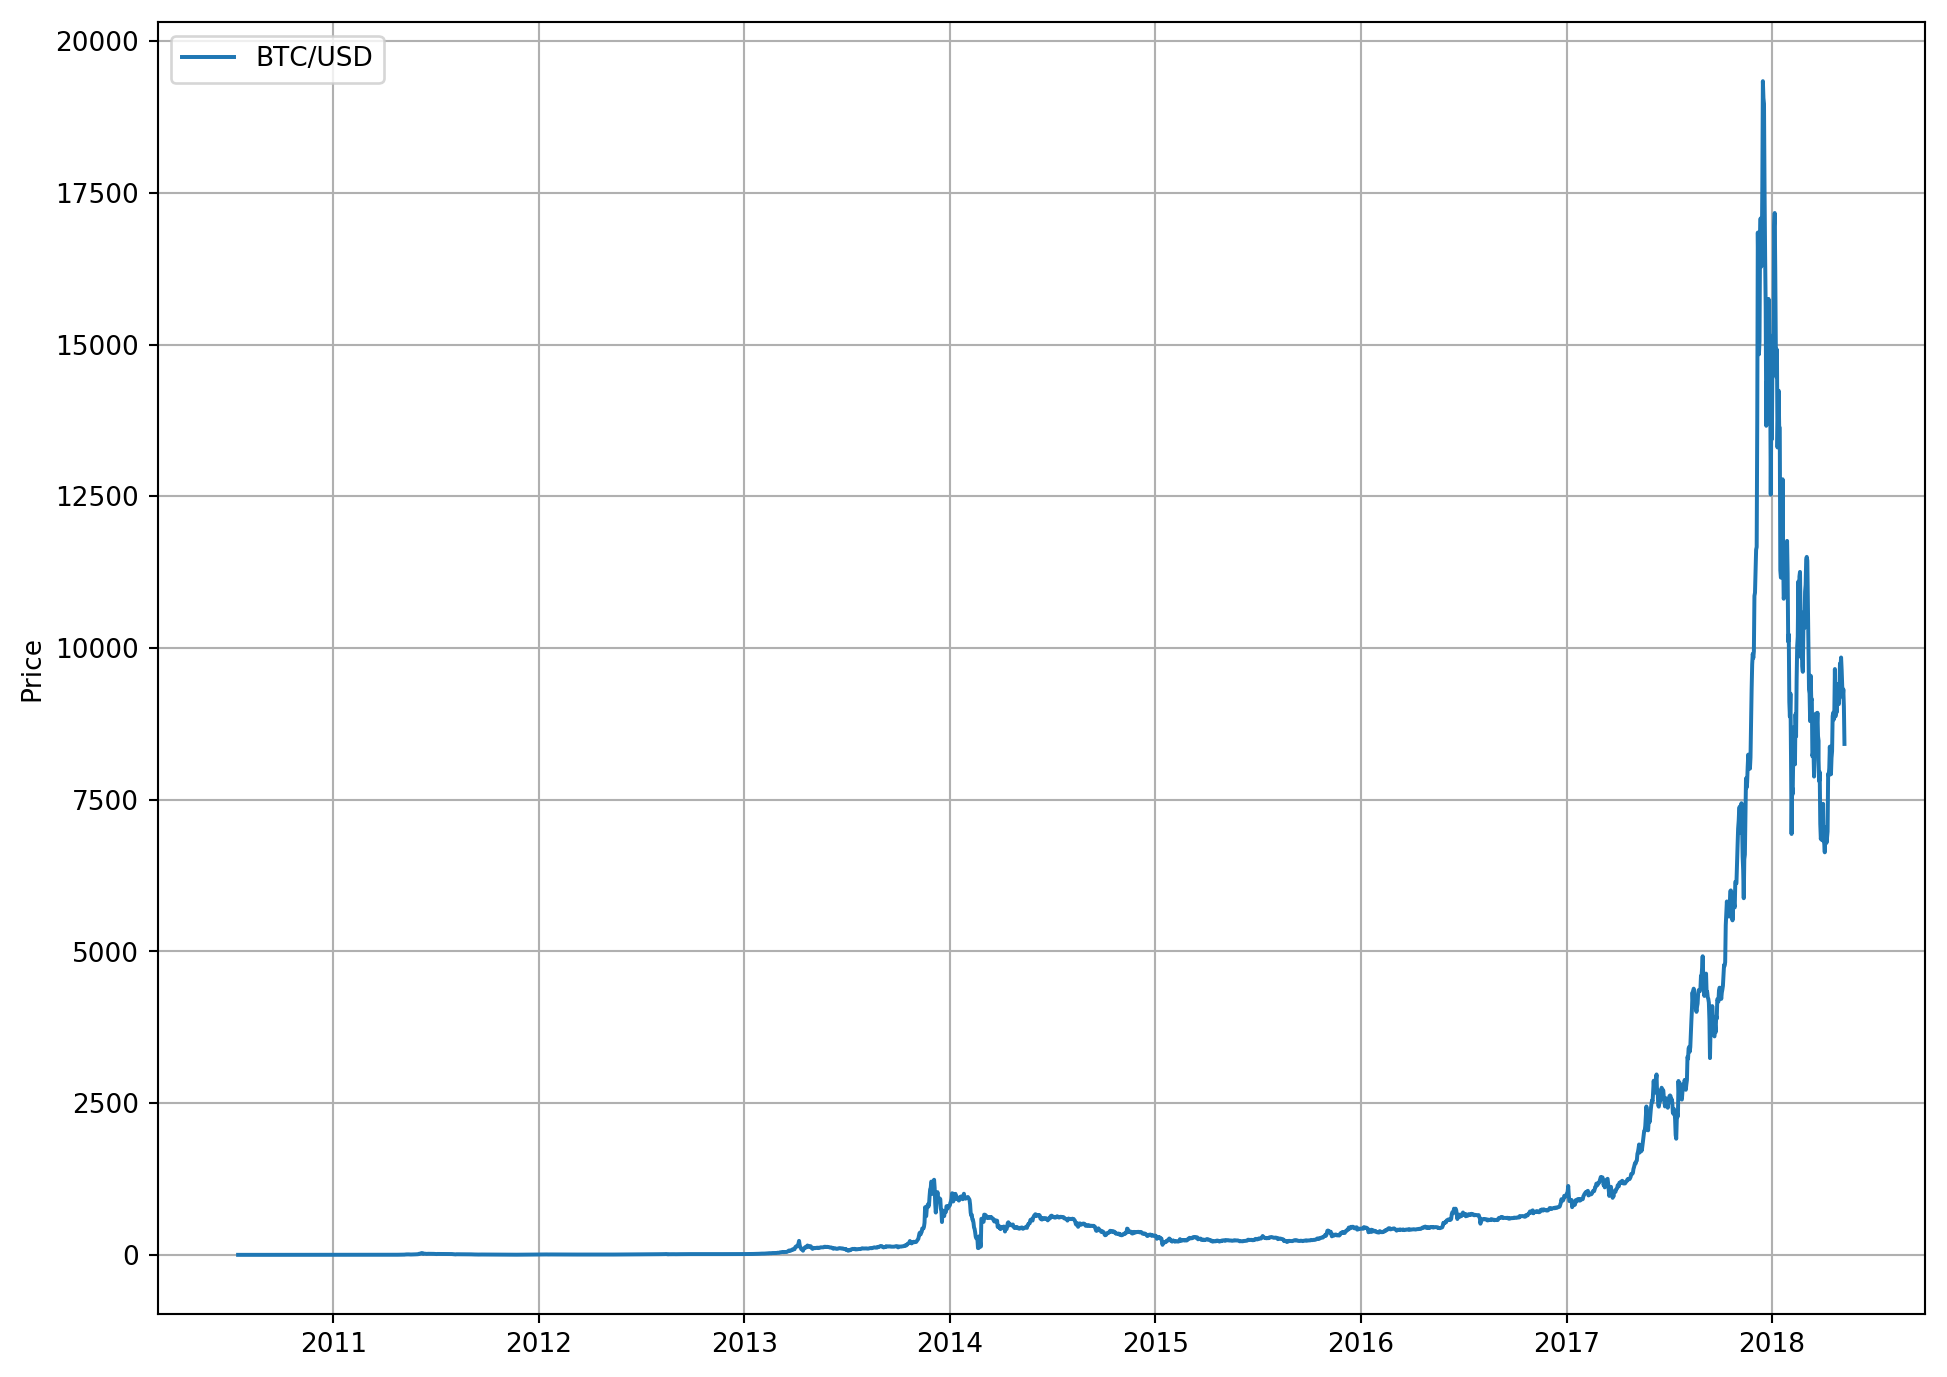

In [13]:
plt.figure(figsize=(12, 9), dpi=190)
plt.plot(btc_data.index, btc_data['Close'])
plt.grid(True)
plt.ylabel('Price')
plt.legend(['BTC/USD']);

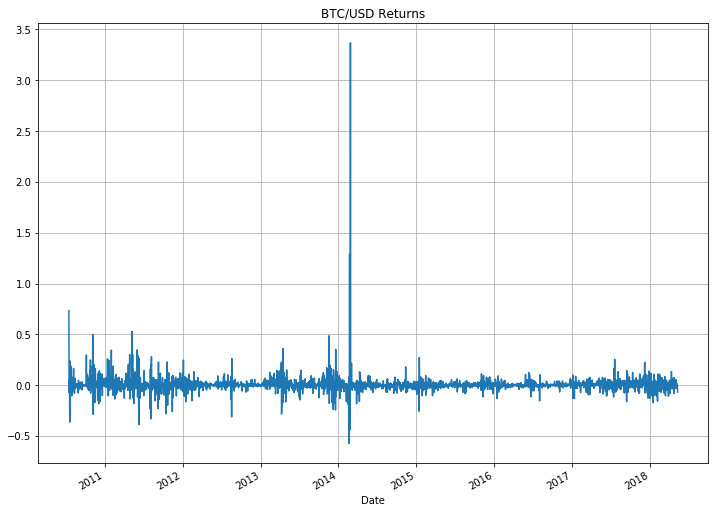

In [14]:
btc_returns = btc_data['Close'].pct_change()[1:]
btc_returns.plot(title='BTC/USD Returns', grid=True, figsize=(12,9));

Clearly due to BTC's extreme volatility there is a huge jump in returns around 2014, let us consider snippets of time prior, during and after this period.

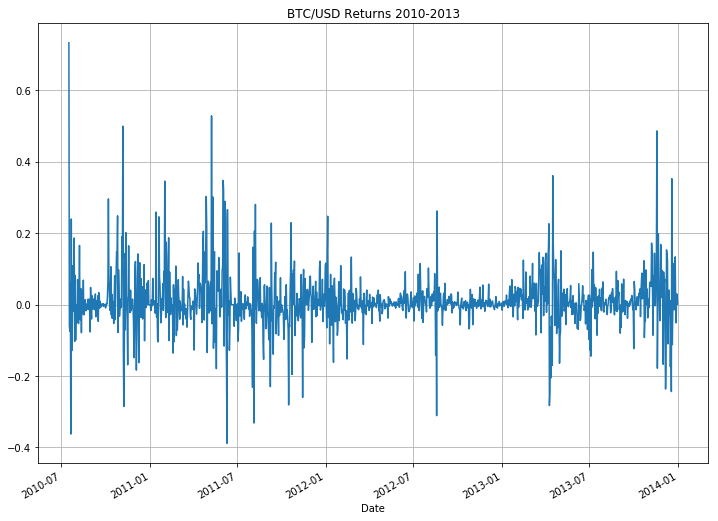

In [15]:
btc_returns['2010':'2013'].plot(title='BTC/USD Returns 2010-2013', grid=True, figsize=(12,9));

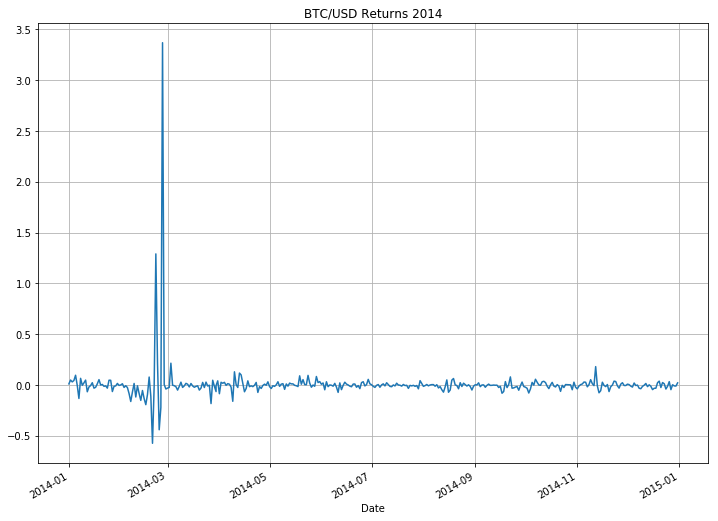

In [16]:
btc_returns['2014'].plot(title='BTC/USD Returns 2014', grid=True, figsize=(12,9));

In [17]:
btc_data['2014-02']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-01,938.849976,969.190002,927.799988,940.419983,940.419983,4118865
2014-02-02,940.419983,959.380005,934.409973,953.309998,953.309998,1495327
2014-02-03,953.309998,959.580017,931.669983,931.710022,931.710022,2601784
2014-02-04,931.710022,949.099976,900.760010,926.640015,926.640015,4250751
2014-02-05,926.640015,939.750000,890.049988,904.520020,904.520020,6865987
2014-02-06,904.520020,908.770020,800.929993,828.869995,828.869995,15719958
2014-02-07,828.869995,833.070007,651.729980,695.650024,695.650024,36412212
2014-02-08,695.650024,719.260010,632.080017,648.780029,648.780029,15503790
2014-02-09,648.780029,694.119995,622.530029,659.570007,659.570007,13186251


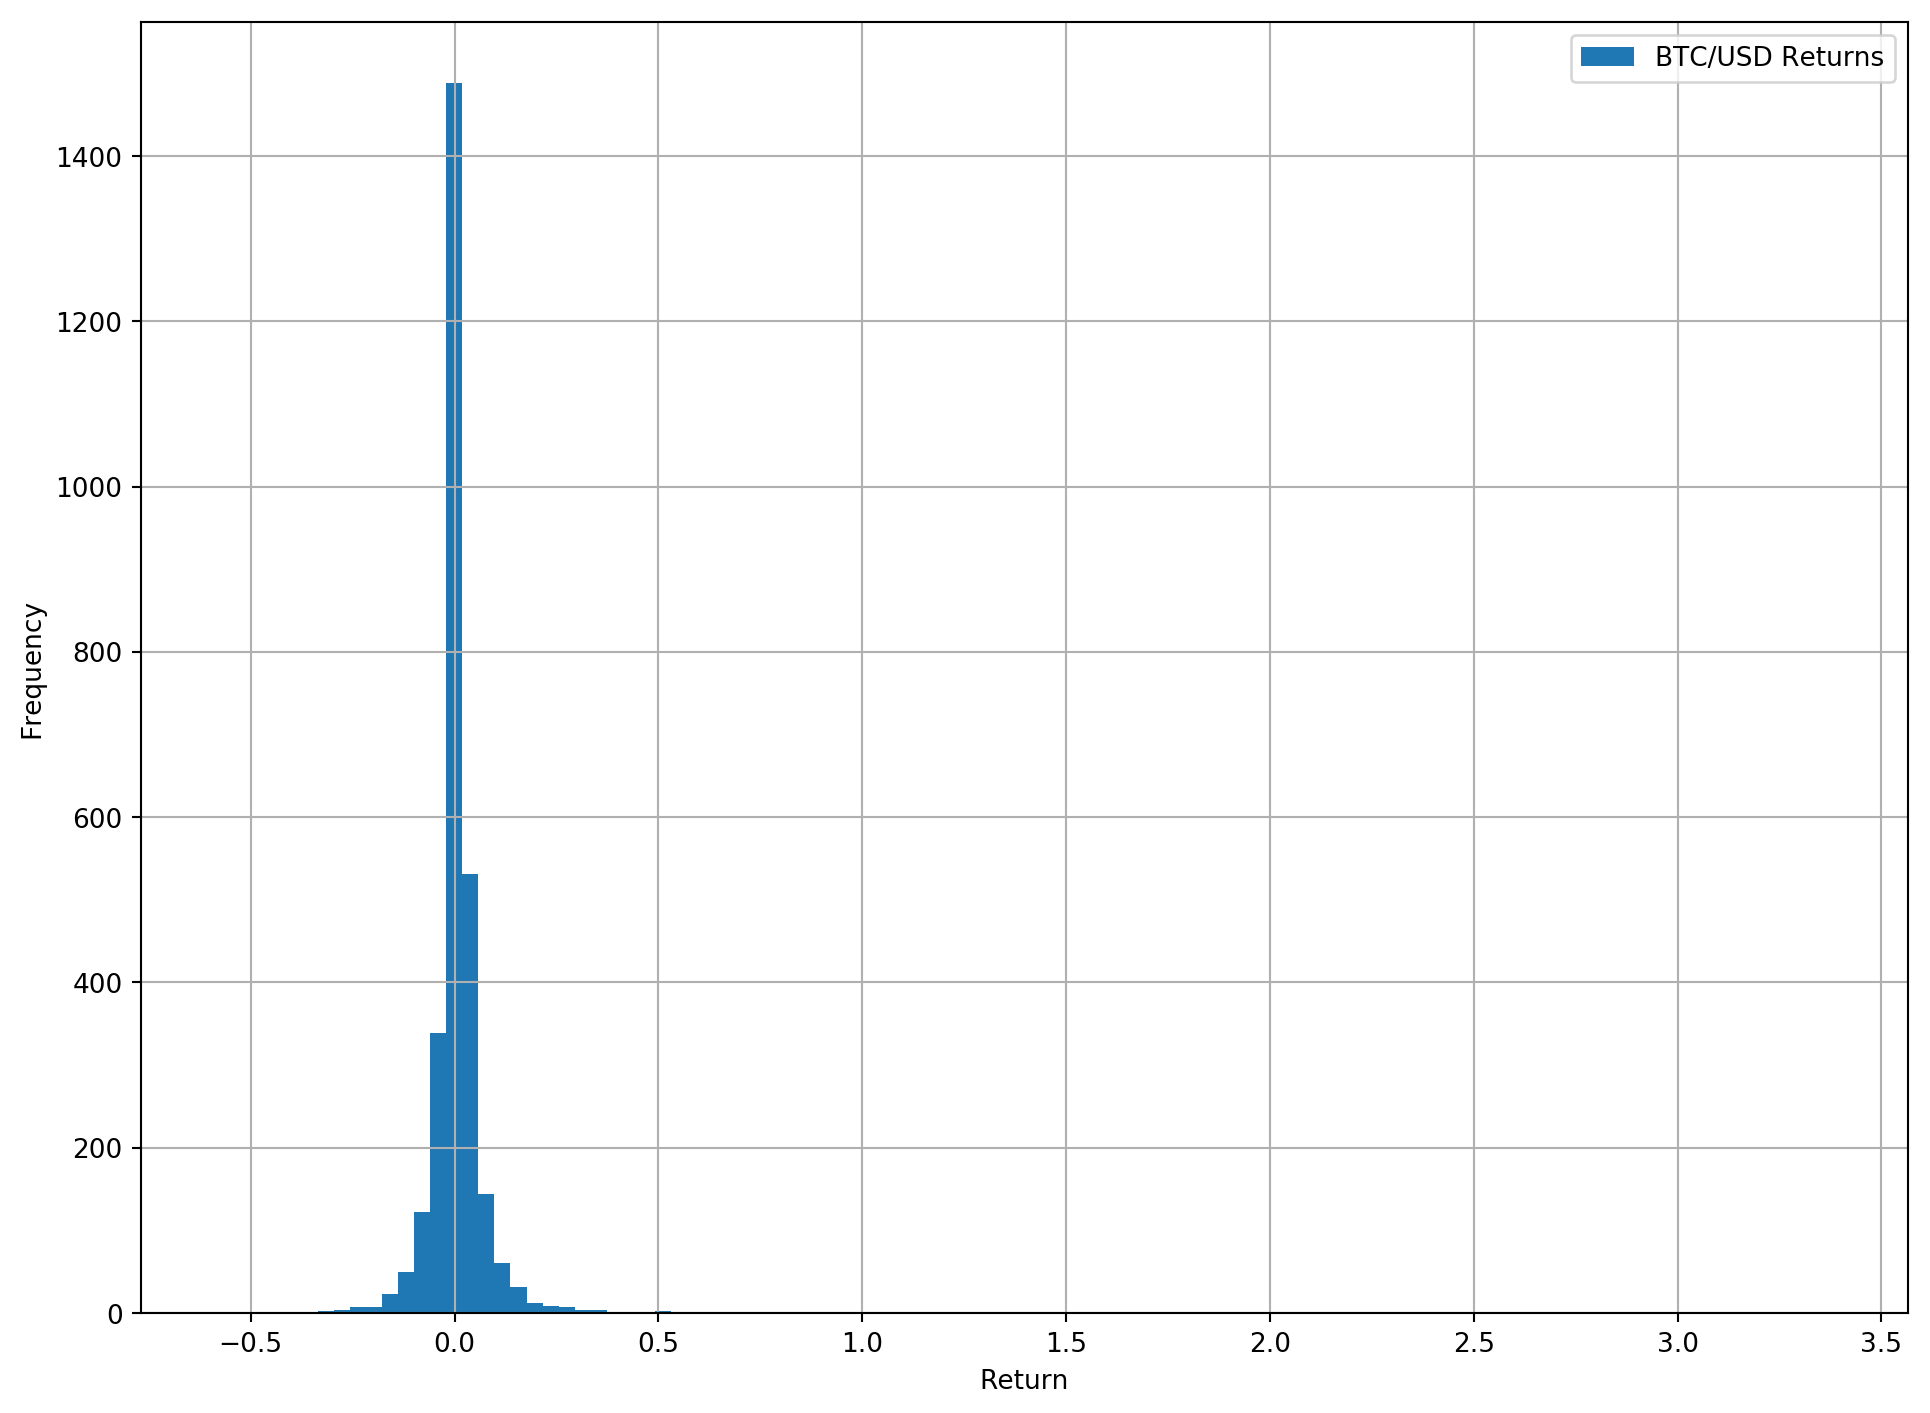

In [18]:
plt.figure(figsize=(12, 9), dpi=190)
plt.hist(btc_returns, bins=100)
plt.grid(True)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['BTC/USD Returns']);

## CHF/USD Returns

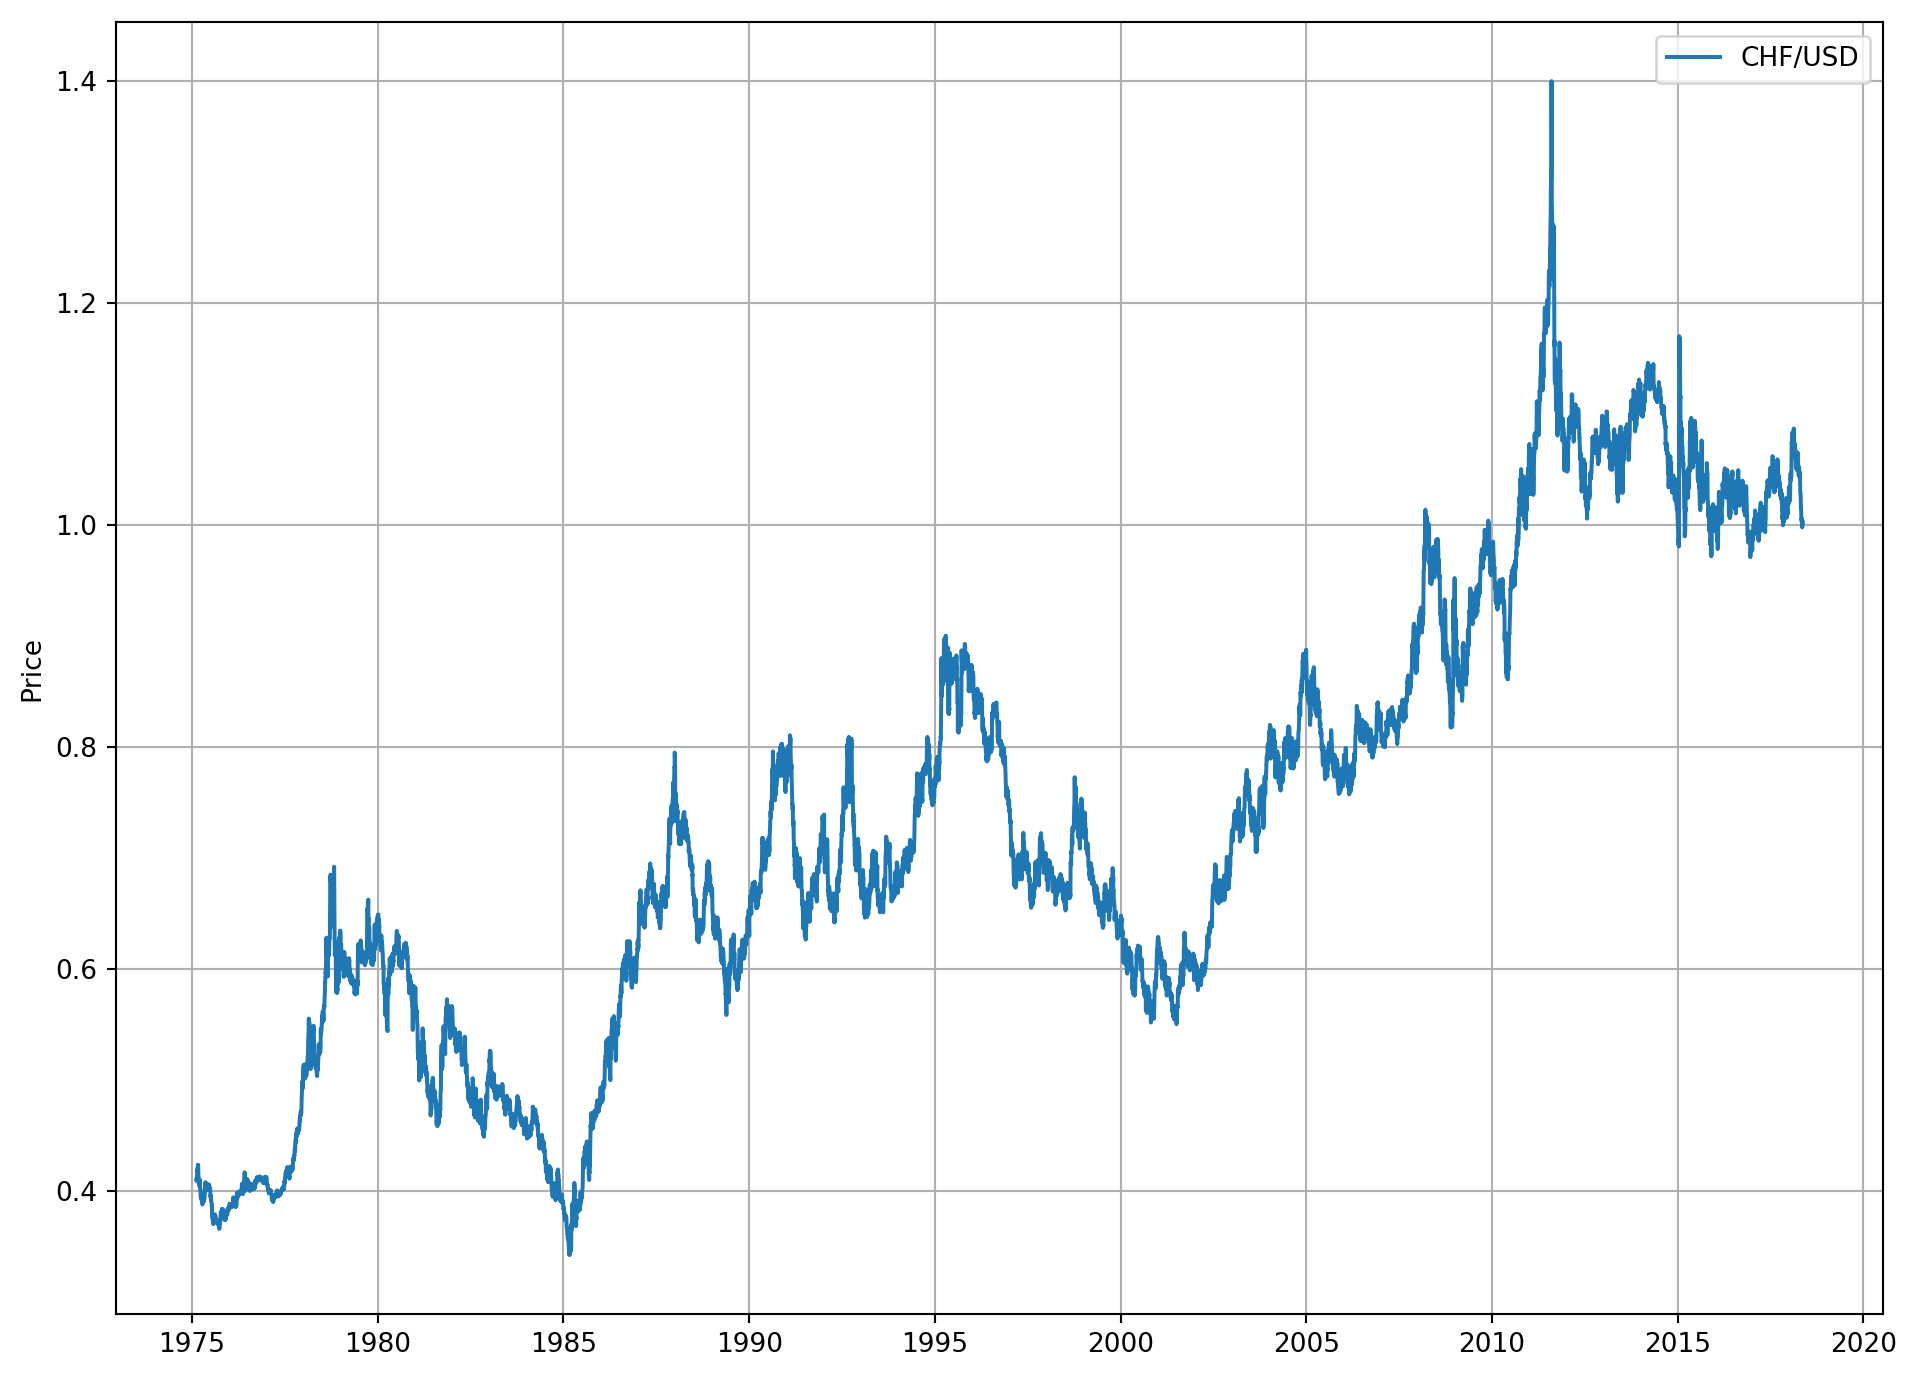

In [19]:
plt.figure(figsize=(12, 9), dpi=190)
plt.plot(chfusd_data.index, chfusd_data['Last'])
plt.grid(True)
plt.ylabel('Price')
plt.legend(['CHF/USD']);

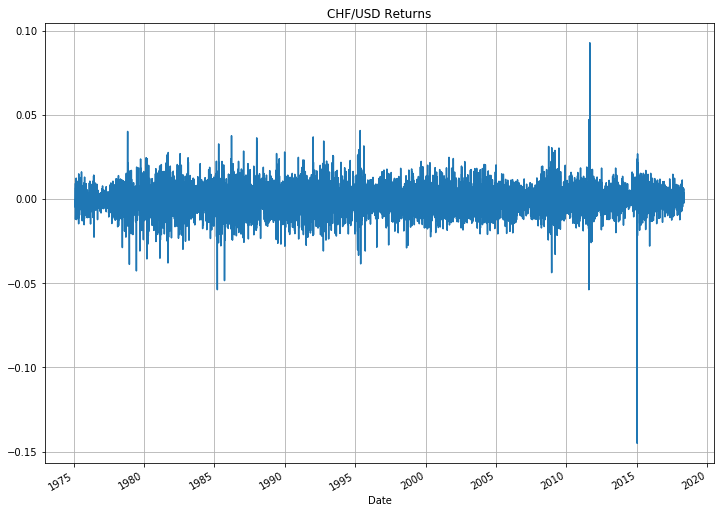

In [20]:
chfusd_returns = chfusd_data['Last'].pct_change()[1:]
chfusd_returns.plot(title='CHF/USD Returns',grid=True, figsize=(12, 9));

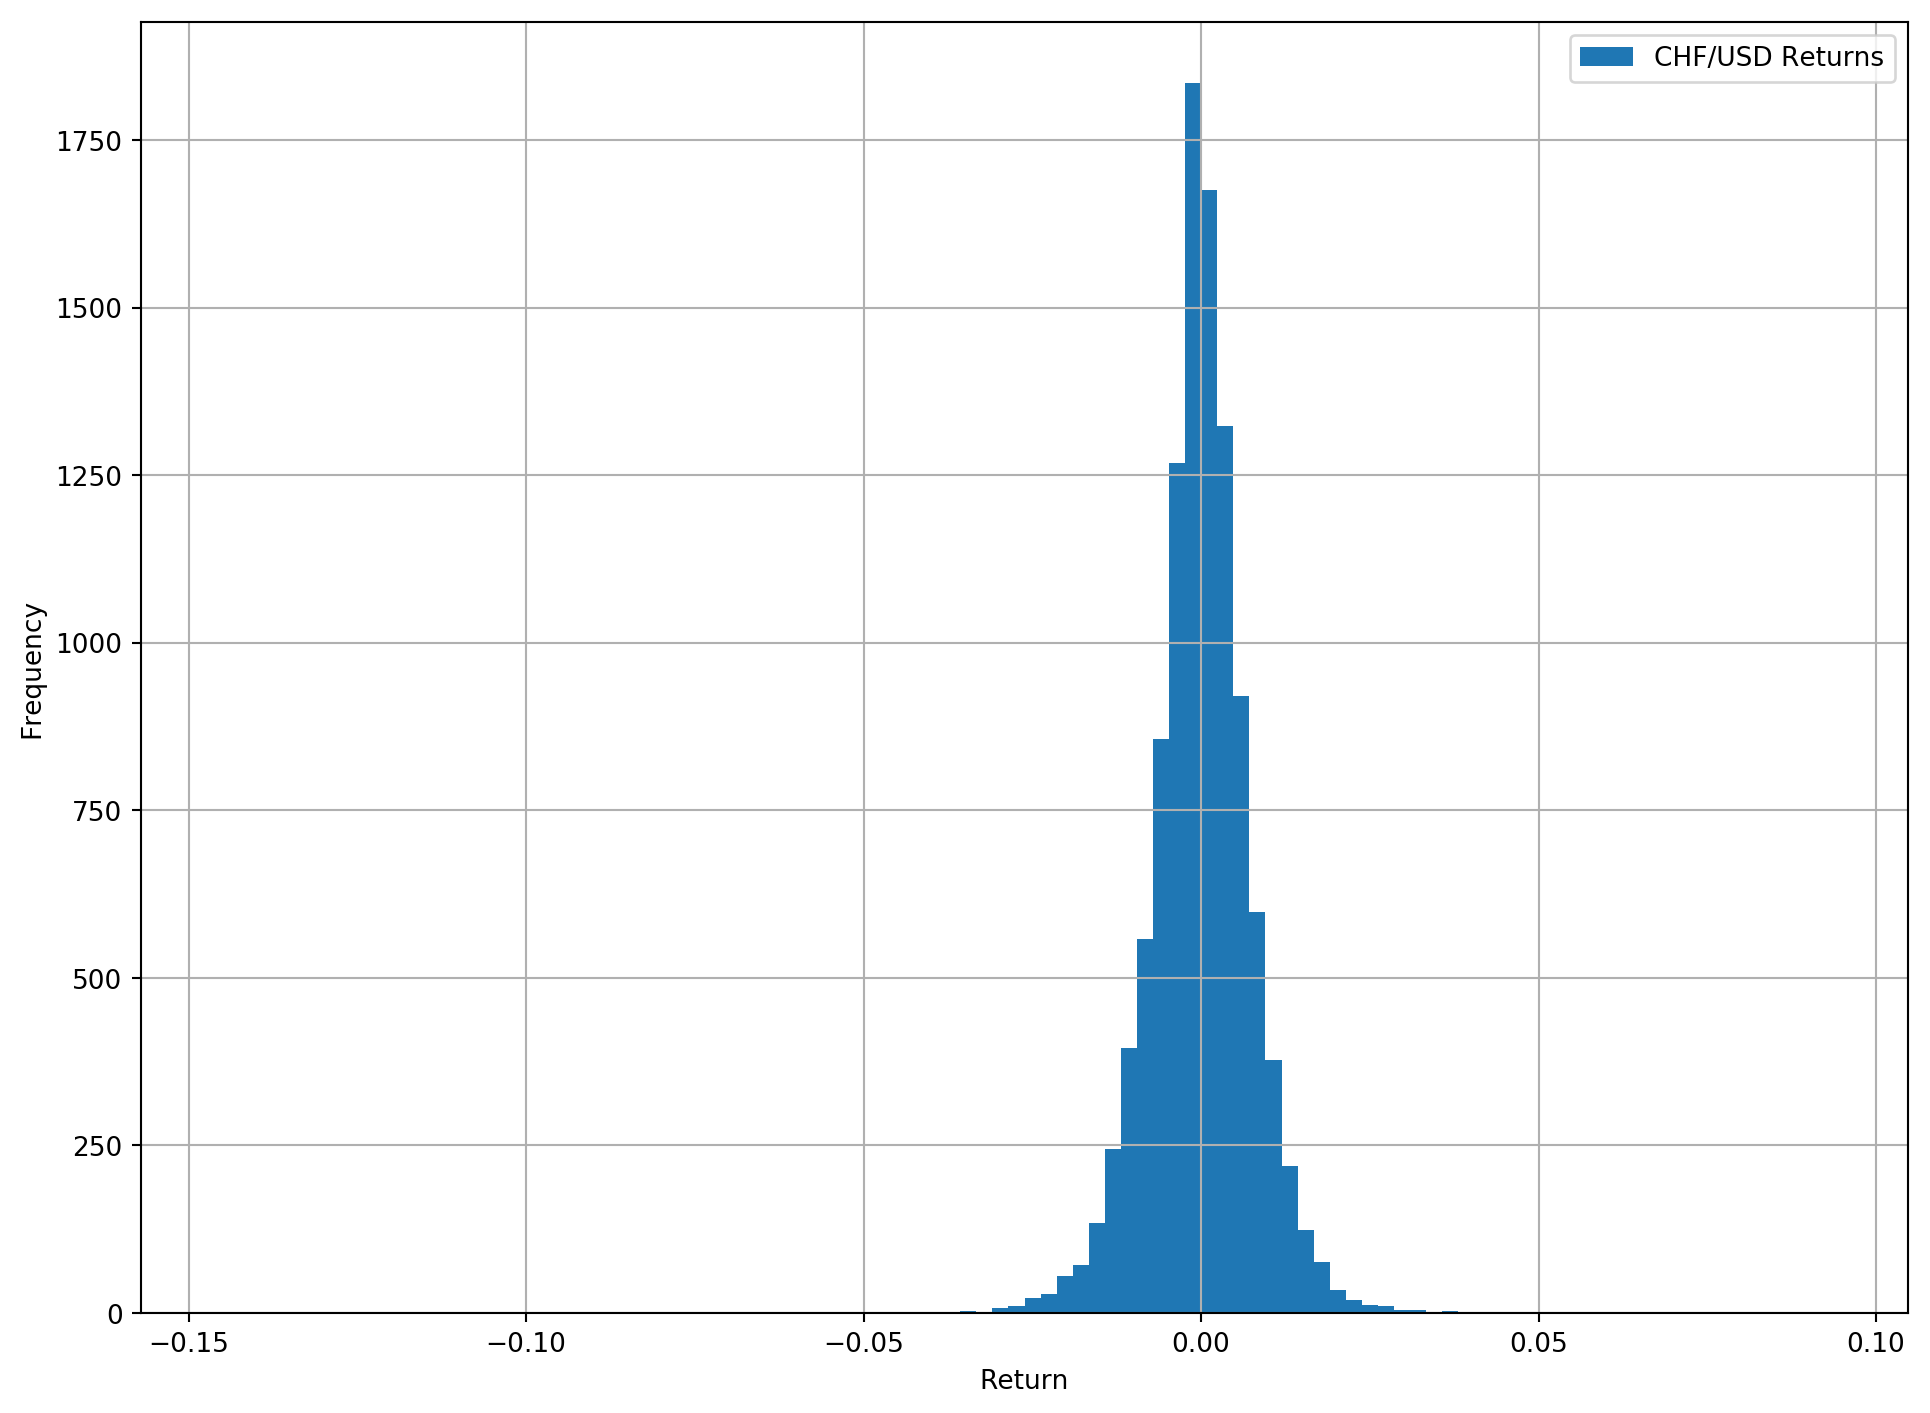

In [23]:
plt.figure(figsize=(12, 9), dpi=190)
plt.hist(chfusd_returns, bins=100)
plt.grid(True)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['CHF/USD Returns']);

## Kurtosis

Below we plot the running kurtosis for all our returns. The goal is to observe whether the empirical kurtosis suggests that the data has infinite kurtosis. If this is the case, we will use the Median Absolute Deviation and not the Mean Square Error to predict the voltality (to see why note that the MSE of the squared term will give you the fourth moment which we're suggesting is infinite!)


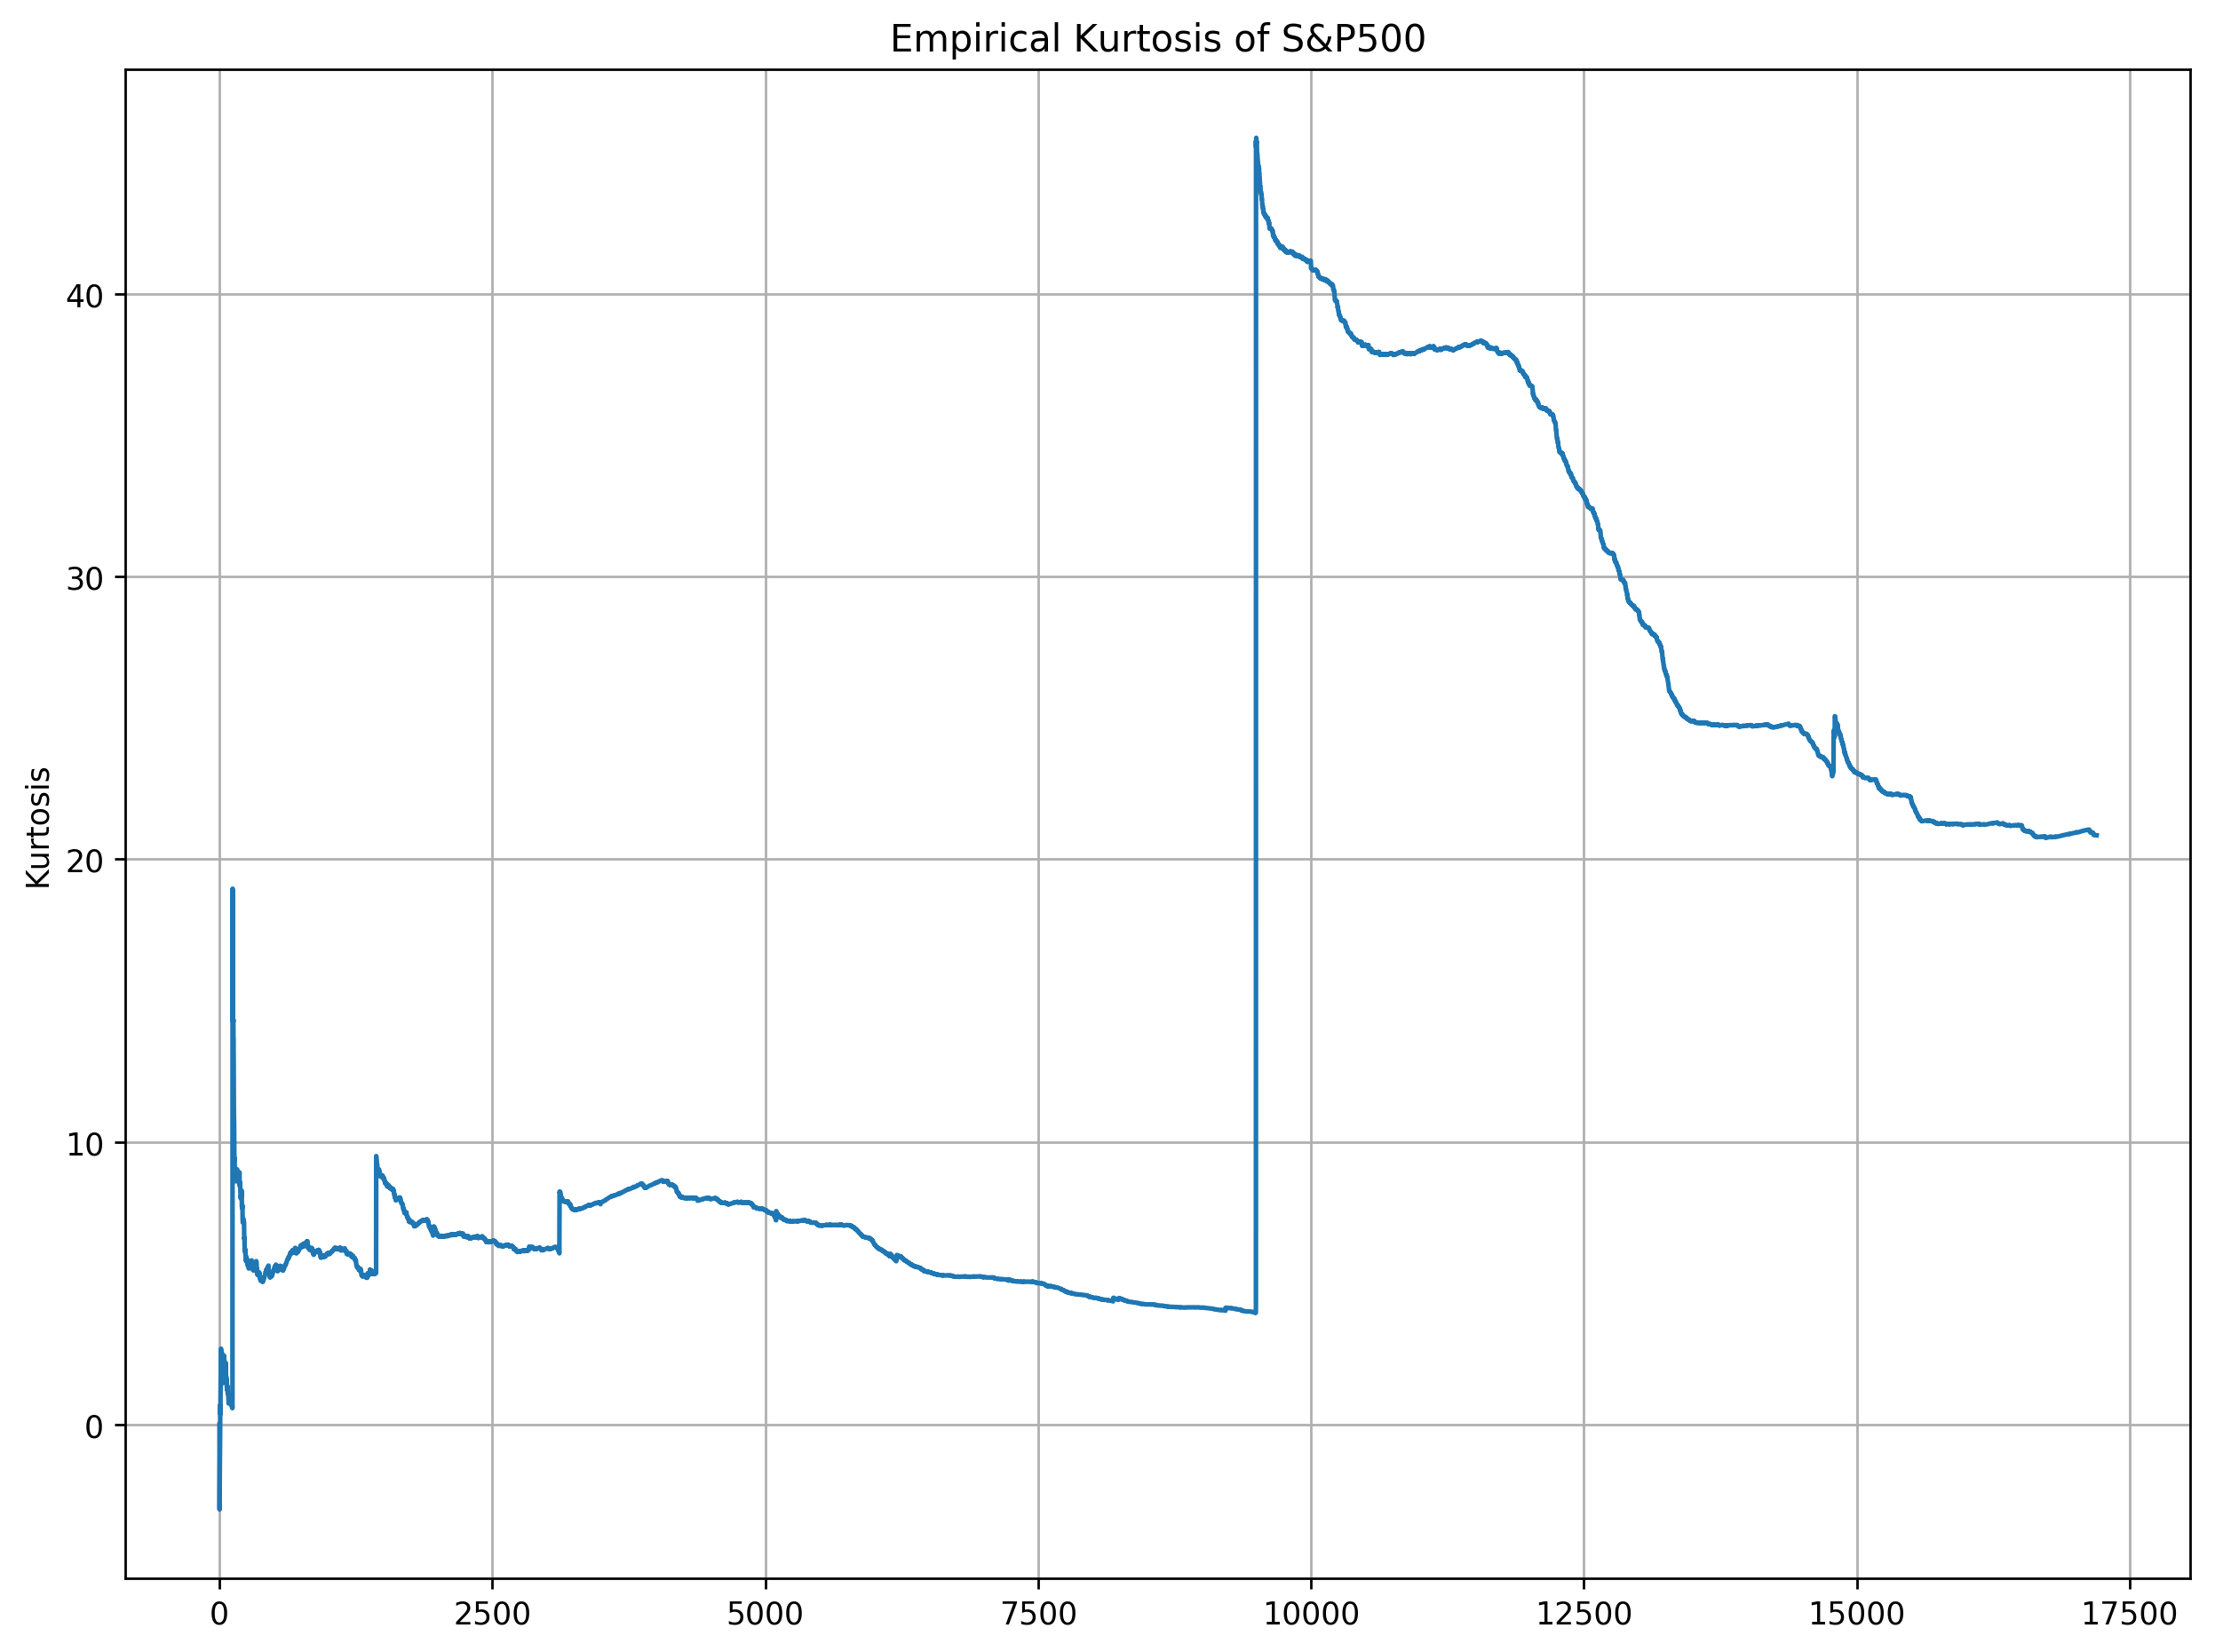

In [21]:
sp500_kurtosis = [0.0]*len(sp500_returns)
for i in range(1,len(sp500_returns)):
    sp500_kurtosis[i] = kurtosis(sp500_returns[0:i])

plt.figure(figsize=(12, 9), dpi=250)
plt.plot(range(len(sp500_kurtosis)), sp500_kurtosis)
plt.grid(True)
plt.ylabel('Kurtosis')
plt.title('Empirical Kurtosis of S&P500');

Plot above confirms our understanding of the infinite kurtosis of financial time series as argued in Politis's Model-Free Monograph (2015). Although the extreme jump near the first 10000 data points is quite disconcerting, let's see if we can understand it better.

In [30]:
max_val_index = sp500_kurtosis.index(max(sp500_kurtosis)) # index of maximum value
sp500_data.index[max_val_index]

Timestamp('1987-10-21 00:00:00')

In [33]:
sp500_kurtosis[max_val_index-5:max_val_index+1]

[3.958880884433773,
 3.95496982264906,
 4.091545519764892,
 45.401744922628204,
 45.169856934292596,
 45.51683644451154]

This brief exploration into the kurtosis makes sense as the date of the extreme jump is the Black Monday crash of 1987. Surprisngly the jump in kurtosis isn't as large during the most recent financial crisis of 2008.

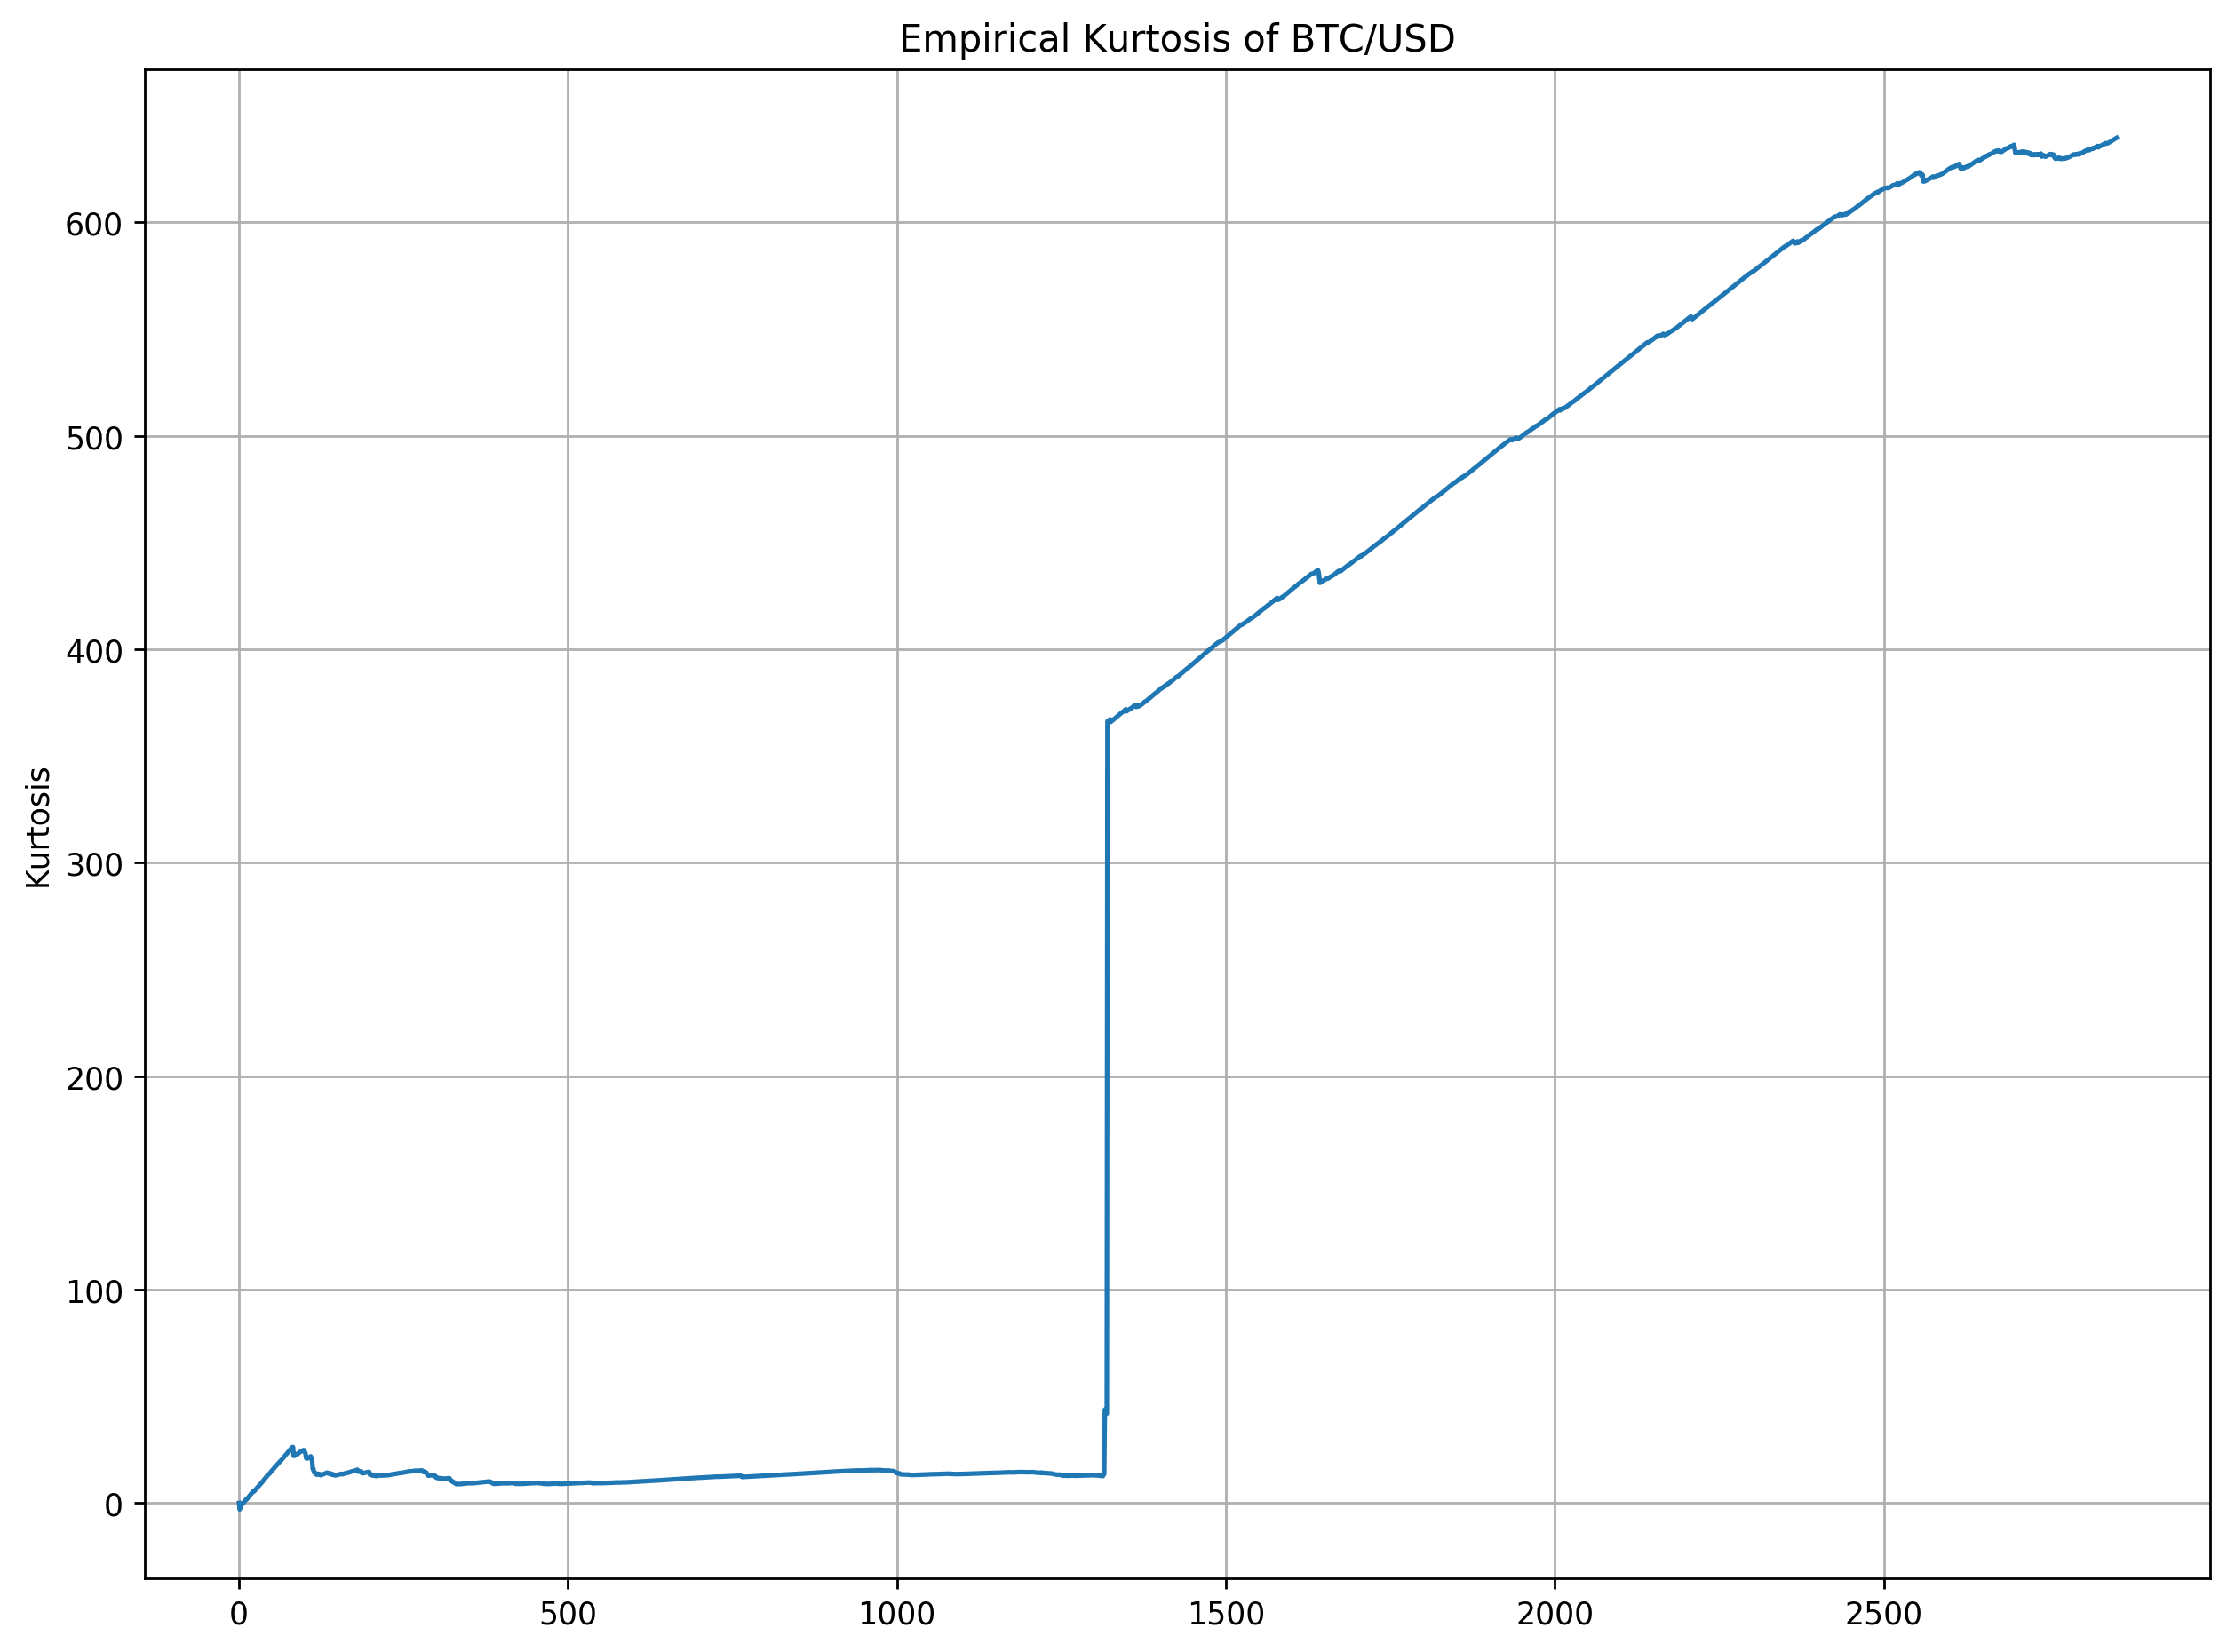

In [30]:
btc_kurtosis = [0.0]*len(btc_returns)
for i in range(1,len(btc_returns)):
    btc_kurtosis[i] = kurtosis(btc_returns[0:i])

plt.figure(figsize=(12, 9), dpi=250)
plt.plot(range(len(btc_kurtosis)), btc_kurtosis)
plt.grid(True)
plt.ylabel('Kurtosis')
plt.title('Empirical Kurtosis of BTC/USD');

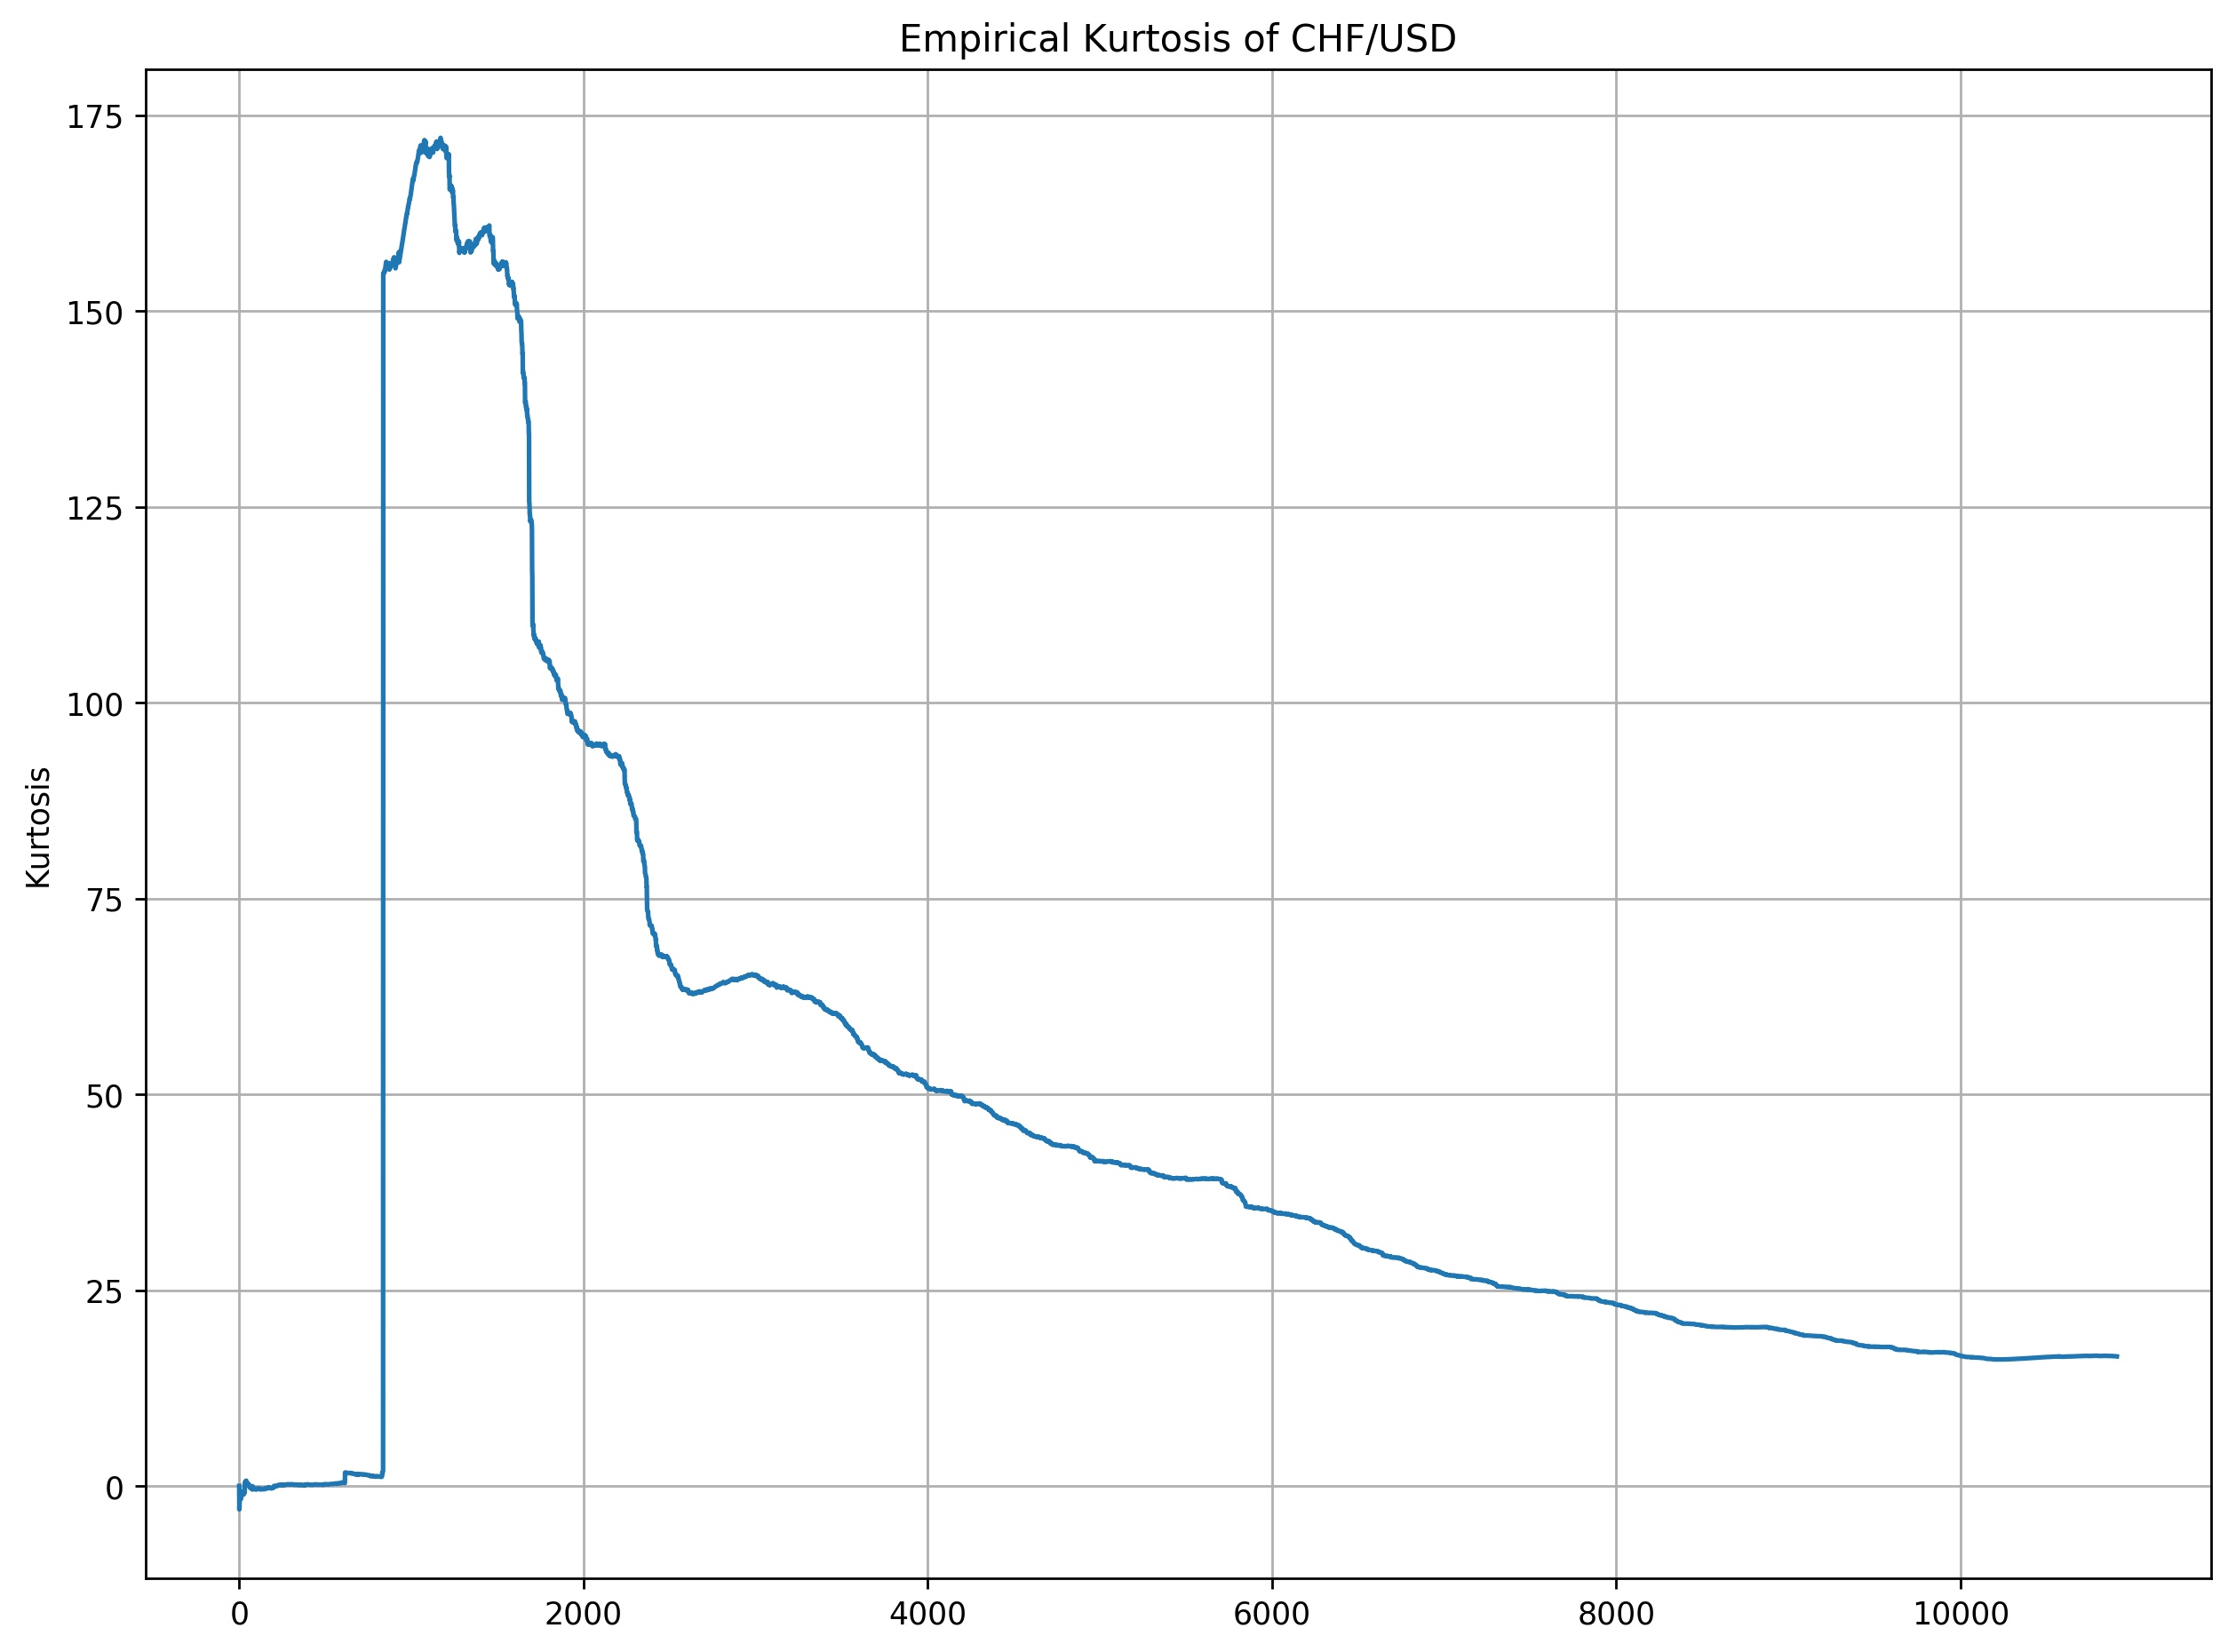

In [22]:
chfusd_kurtosis = [0.0]*len(chfusd_returns)
for i in range(1,len(chfusd_returns)):
    chfusd_kurtosis[i] = kurtosis(chfusd_returns[0:i])

plt.figure(figsize=(12, 9), dpi=250)
plt.plot(range(len(chfusd_kurtosis)), chfusd_kurtosis)
plt.grid(True)
plt.ylabel('Kurtosis')
plt.title('Empirical Kurtosis of CHF/USD');